## Data Analysis

Code to explore the data obtained from  DengAI: [Predicting Disease Spread Competition](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/)

In [2]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install seaborn

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |################################| 8.1MB 4.4MB/s eta 0:00:01
    100% |################################| 235kB 12.1MB/s ta 0:00:01
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
x_train = pd.read_csv('../data/dengue_features_train.csv')
x_train.head(10)

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5   sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6   sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7   sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8   sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9   sj  1990          27      1990-07-02       NaN  0.121550  0.160683   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k        ...          \
0  0.177617                 12.42             297.572857        ...           
1  0.155486                 22.82             298.211429        ...           
2  0.170843                 34.54             298.781429        ...           
3  0.235886                 15.36             298.987143        ...           
4  0.247340                  7.52             299.518571        ...           
5  0.181743                  9.58             299.630000        ...           
6  0.210271                  3.48             299.207143        ...           
7  0.133029                151.12             299.591429        ...           
8  0.123600                 19.32             299.578571        ...           
9  0.202567                 14.41             300.154286        ...           

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   
5                            26.49                             79.891429   
6                            38.60                             82.000000   
7                            30.00                             83.375714   
8                            37.51                             82.768571   
9                            28.40                             81.281429   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   
5                          9.58                              17.212857   
6                          3.48                              17.234286   
7                        151.12                              17.977143   
8                         19.32                              17.790000   
9                         14.41                              18.071429   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   
5           2.100000           28.114286                 6.942857   
6           2.042857           27.414286                 6.771429   
7           1.571429           28.371429                 7.685714   
8           1.885714           28.328571    

## Times series visualization

In [6]:
y_train = pd.read_csv('../data/dengue_labels_train.csv')
y_train.head(10)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6
5   sj  1990          23            2
6   sj  1990          24            4
7   sj  1990          25            5
8   sj  1990          26           10
9   sj  1990          27            6

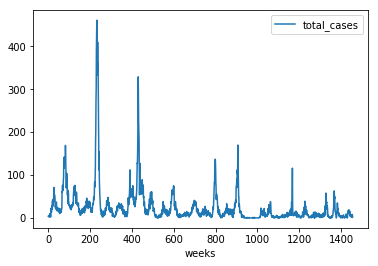

In [7]:
y_train['total_cases'].plot()
plt.xlabel("weeks")
plt.legend()
plt.show()

In [8]:
x_train['week_start_date']=pd.to_datetime(x_train['week_start_date'])
y_train['week_start_date']=pd.to_datetime(x_train['week_start_date'])

## Visualization per city

San Juan - Data from 1990 to 2008

Iquitos - Data from 2000 to 2010

In [9]:
city_sj = y_train[y_train.city == 'sj']
display(city_sj.head(5))
print('Total cases description')
display(city_sj.total_cases.describe().T)

city  year  weekofyear  total_cases week_start_date
0   sj  1990          18            4      1990-04-30
1   sj  1990          19            5      1990-05-07
2   sj  1990          20            4      1990-05-14
3   sj  1990          21            3      1990-05-21
4   sj  1990          22            6      1990-05-28

Total cases description


count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64

In [10]:
city_iq = y_train[y_train.city == 'iq']
display(city_iq.head(5))
print('Total cases description')
display(city_iq.total_cases.describe().T)

city  year  weekofyear  total_cases week_start_date
936   iq  2000          26            0      2000-07-01
937   iq  2000          27            0      2000-07-08
938   iq  2000          28            0      2000-07-15
939   iq  2000          29            0      2000-07-22
940   iq  2000          30            0      2000-07-29

Total cases description


count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

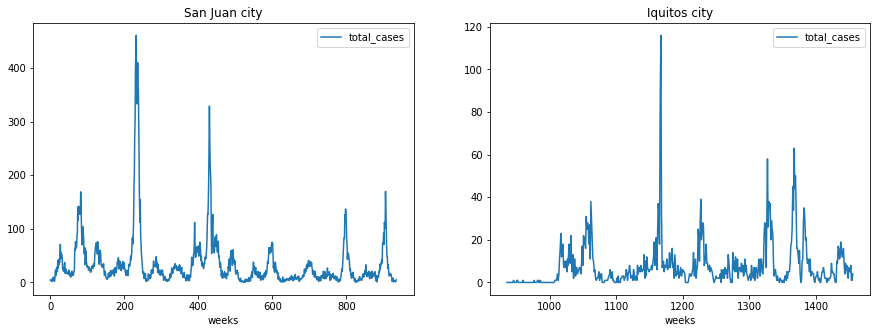

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
city_sj['total_cases'].plot()
plt.xlabel("weeks")
plt.legend()
plt.title('San Juan city')

plt.subplot(1,2,2)
city_iq['total_cases'].plot()
plt.xlabel("weeks")
plt.legend()
plt.title('Iquitos city');

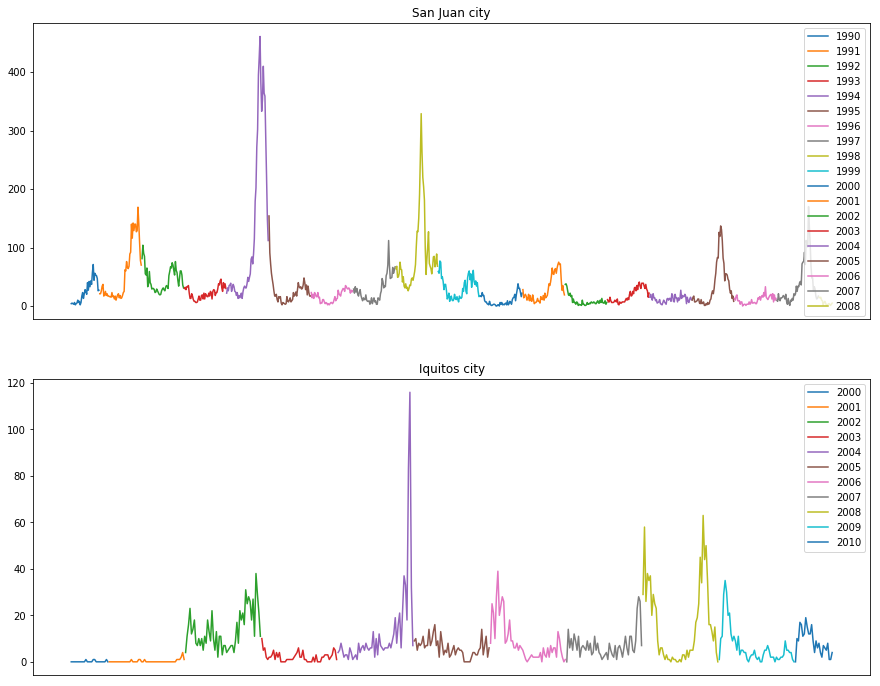

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)

years = city_sj['year'].unique()
for year in years:
    temp_sj = city_sj['total_cases'].loc[city_sj['year']==year]
    plt.plot(temp_sj, label = year)
plt.xticks([])
plt.title('San Juan city')
plt.legend(loc=1, prop={'size': 10})

plt.subplot(2,1,2)
years = city_iq['year'].unique()
for year in years:
    temp_iq = city_iq['total_cases'].loc[city_iq['year']==year]
    plt.plot(temp_iq, label = year)
plt.xticks([])
plt.title('Iquitos city')
plt.legend(loc=1, prop={'size': 10})

plt.show()

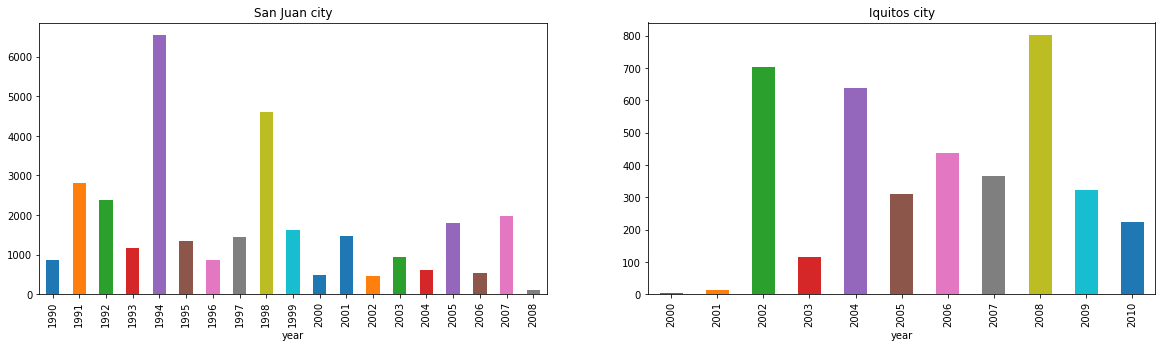

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
city_sj.groupby(['year']).total_cases.sum().plot(kind='bar')
plt.title('San Juan city')

plt.subplot(1,2,2)
city_iq.groupby(['year']).total_cases.sum().plot(kind='bar')
plt.title('Iquitos city')

plt.show()

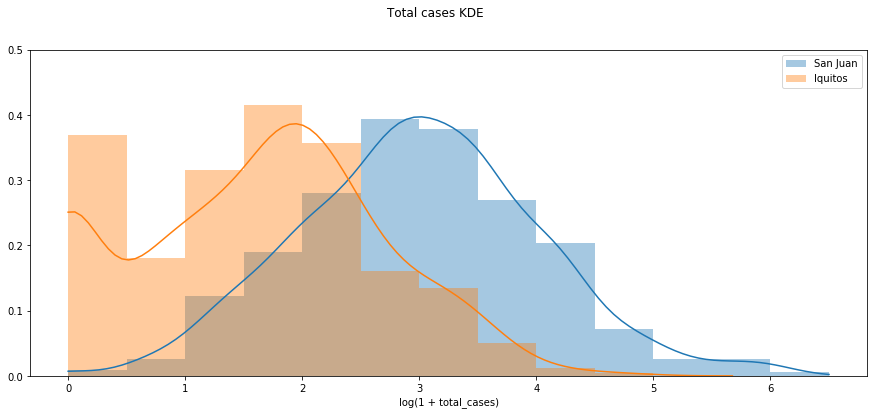

In [14]:
fig, ax = plt.subplots(figsize = (15,6))
fig.suptitle('Total cases KDE')
sns.distplot(np.log(1+y_train[y_train['city'] == 'sj']['total_cases']), kde = True,
             kde_kws={'clip': (0.0, 6.5)}, bins = np.arange(0, 7,0.5), norm_hist = True, label = 'San Juan')
sns.distplot(np.log(1+y_train[y_train['city'] == 'iq']['total_cases']), kde = True,
             kde_kws={'clip': (0.0, 6.5)}, bins = np.arange(0, 7,0.5), norm_hist = True, label = 'Iquitos')
ax.set_xlabel('log(1 + total_cases)')
ax.legend(loc = 'upper right')
ax.set_ylim(0,0.5);

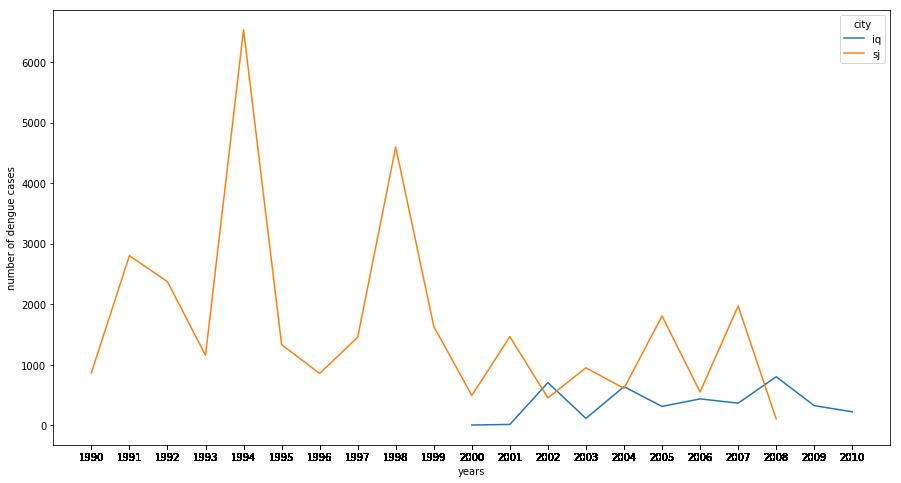

In [15]:
for_pivot = y_train.copy()
### reset axis
for_pivot.index = for_pivot['week_start_date']
for_pivot.drop('week_start_date', axis=1, inplace=True)

pv = pd.pivot_table(for_pivot, index=for_pivot.index.year, columns=for_pivot.city,
                    values='total_cases', aggfunc='sum')

pv.plot(xticks=for_pivot.index.year, figsize=(15,8))
plt.xlabel('years')
plt.ylabel('number of dengue cases')
plt.show()

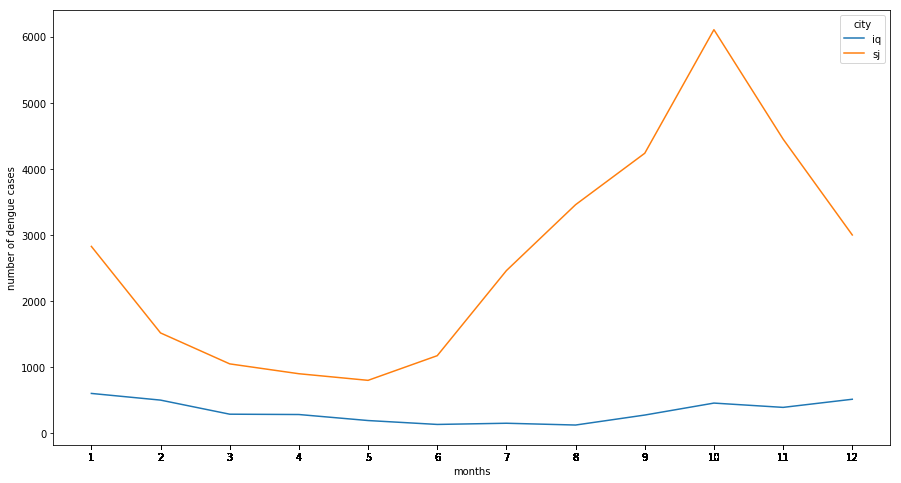

In [16]:
pv = pd.pivot_table(for_pivot, index=for_pivot.index.month, columns=for_pivot.city,
                    values='total_cases', aggfunc='sum')
pv.plot(xticks=for_pivot.index.month, figsize=(15,8))
plt.xlabel('months')
plt.ylabel('number of dengue cases')
plt.show()

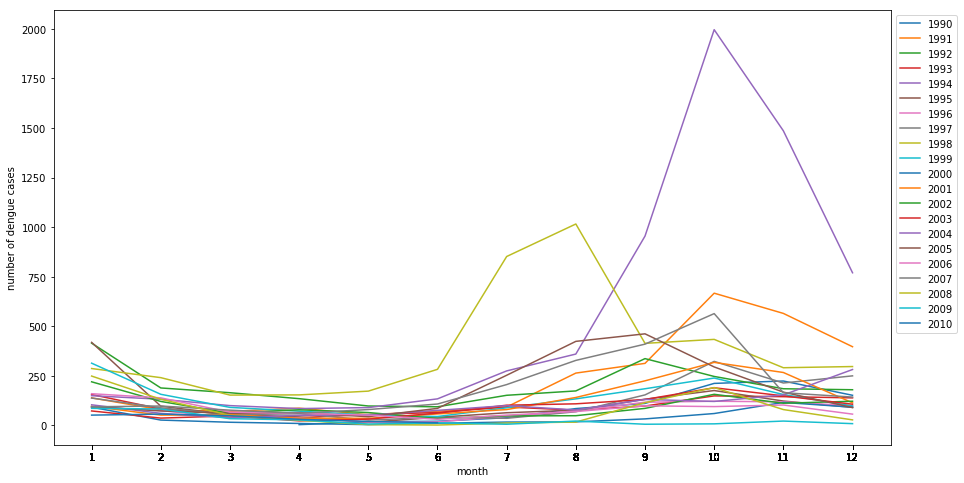

In [17]:
pv = pd.pivot_table(for_pivot, index=for_pivot.index.month, columns=for_pivot.year,
                    values='total_cases', aggfunc='sum')
ax = pv.plot(xticks=for_pivot.index.month, figsize=(15,8))
plt.xlabel('month')
plt.ylabel('number of dengue cases')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


## Features analysis

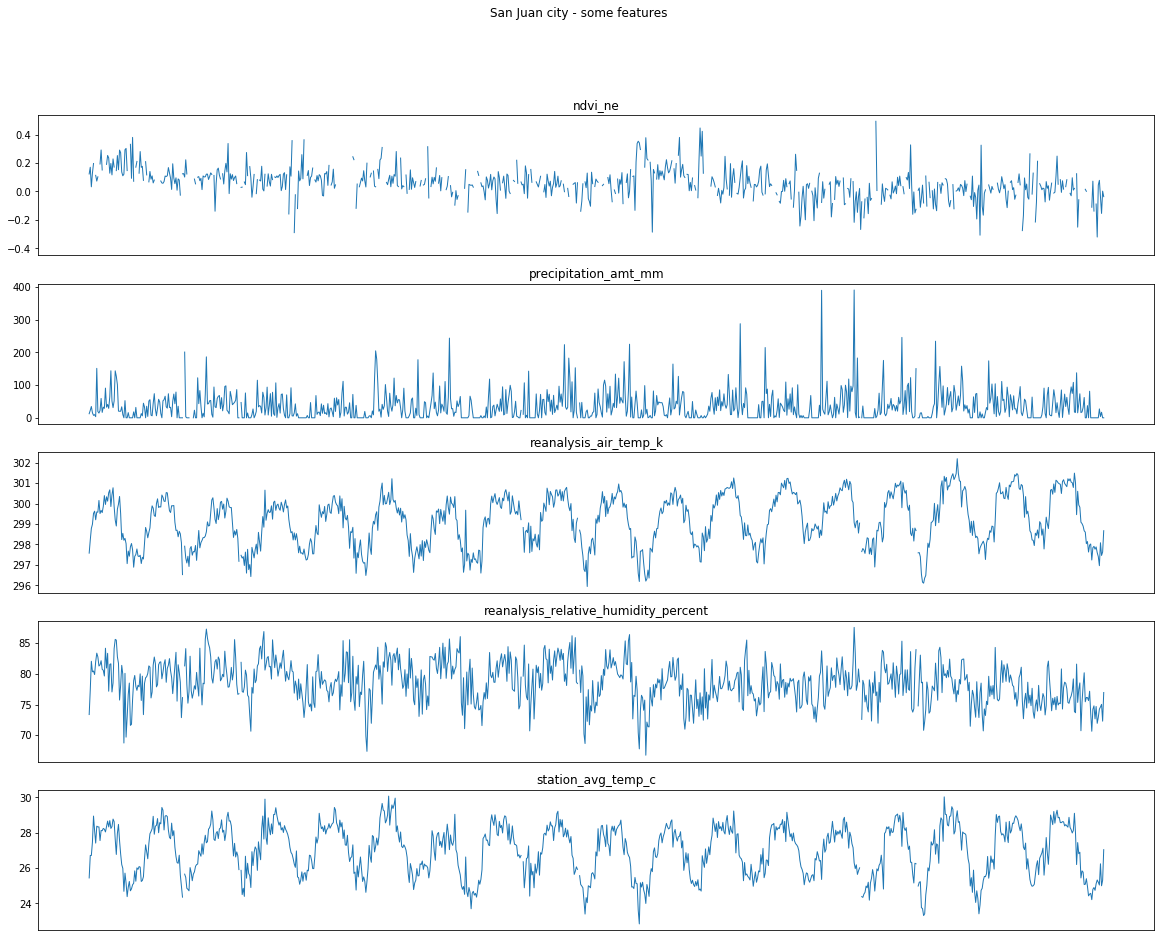

In [18]:
sj_features = x_train[x_train.city == 'sj']
plt.figure(figsize = (20, 15))
plt.suptitle('San Juan city - some features')

plt.subplot(5,1,1)
sj_features.ndvi_ne.plot.line(lw = 1)
plt.xticks([])
plt.title('ndvi_ne')
plt.subplot(5,1,2)
sj_features.precipitation_amt_mm.plot.line(lw = 1)
plt.xticks([])
plt.title('precipitation_amt_mm')
plt.subplot(5,1,3)
sj_features.reanalysis_air_temp_k.plot.line(lw = 1)
plt.xticks([])
plt.title('reanalysis_air_temp_k')
plt.subplot(5,1,4)
sj_features.reanalysis_relative_humidity_percent.plot.line(lw = 1)
plt.xticks([])
plt.title('reanalysis_relative_humidity_percent')
plt.subplot(5,1,5)
sj_features.station_avg_temp_c.plot.line(lw = 1)
plt.xticks([])
plt.title('station_avg_temp_c')

plt.show()

Looking for plots we can notice some missing values. Let's check whether there are any NA values in the columns.

##### Missing Values

In [19]:
print('Quantity of Null elements in each column for San Juan City')
display(sj_features.isnull().sum())

print('Quantity of Null elements in each column for Iquitos City')
iq_features = x_train[x_train.city == 'iq']
display(iq_features.isnull().sum())

Quantity of Null elements in each column for San Juan City


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

Quantity of Null elements in each column for Iquitos City


city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

There are missing values in all features columns.

##### Kernel density estimation

Let's have a statiscal look over each feature

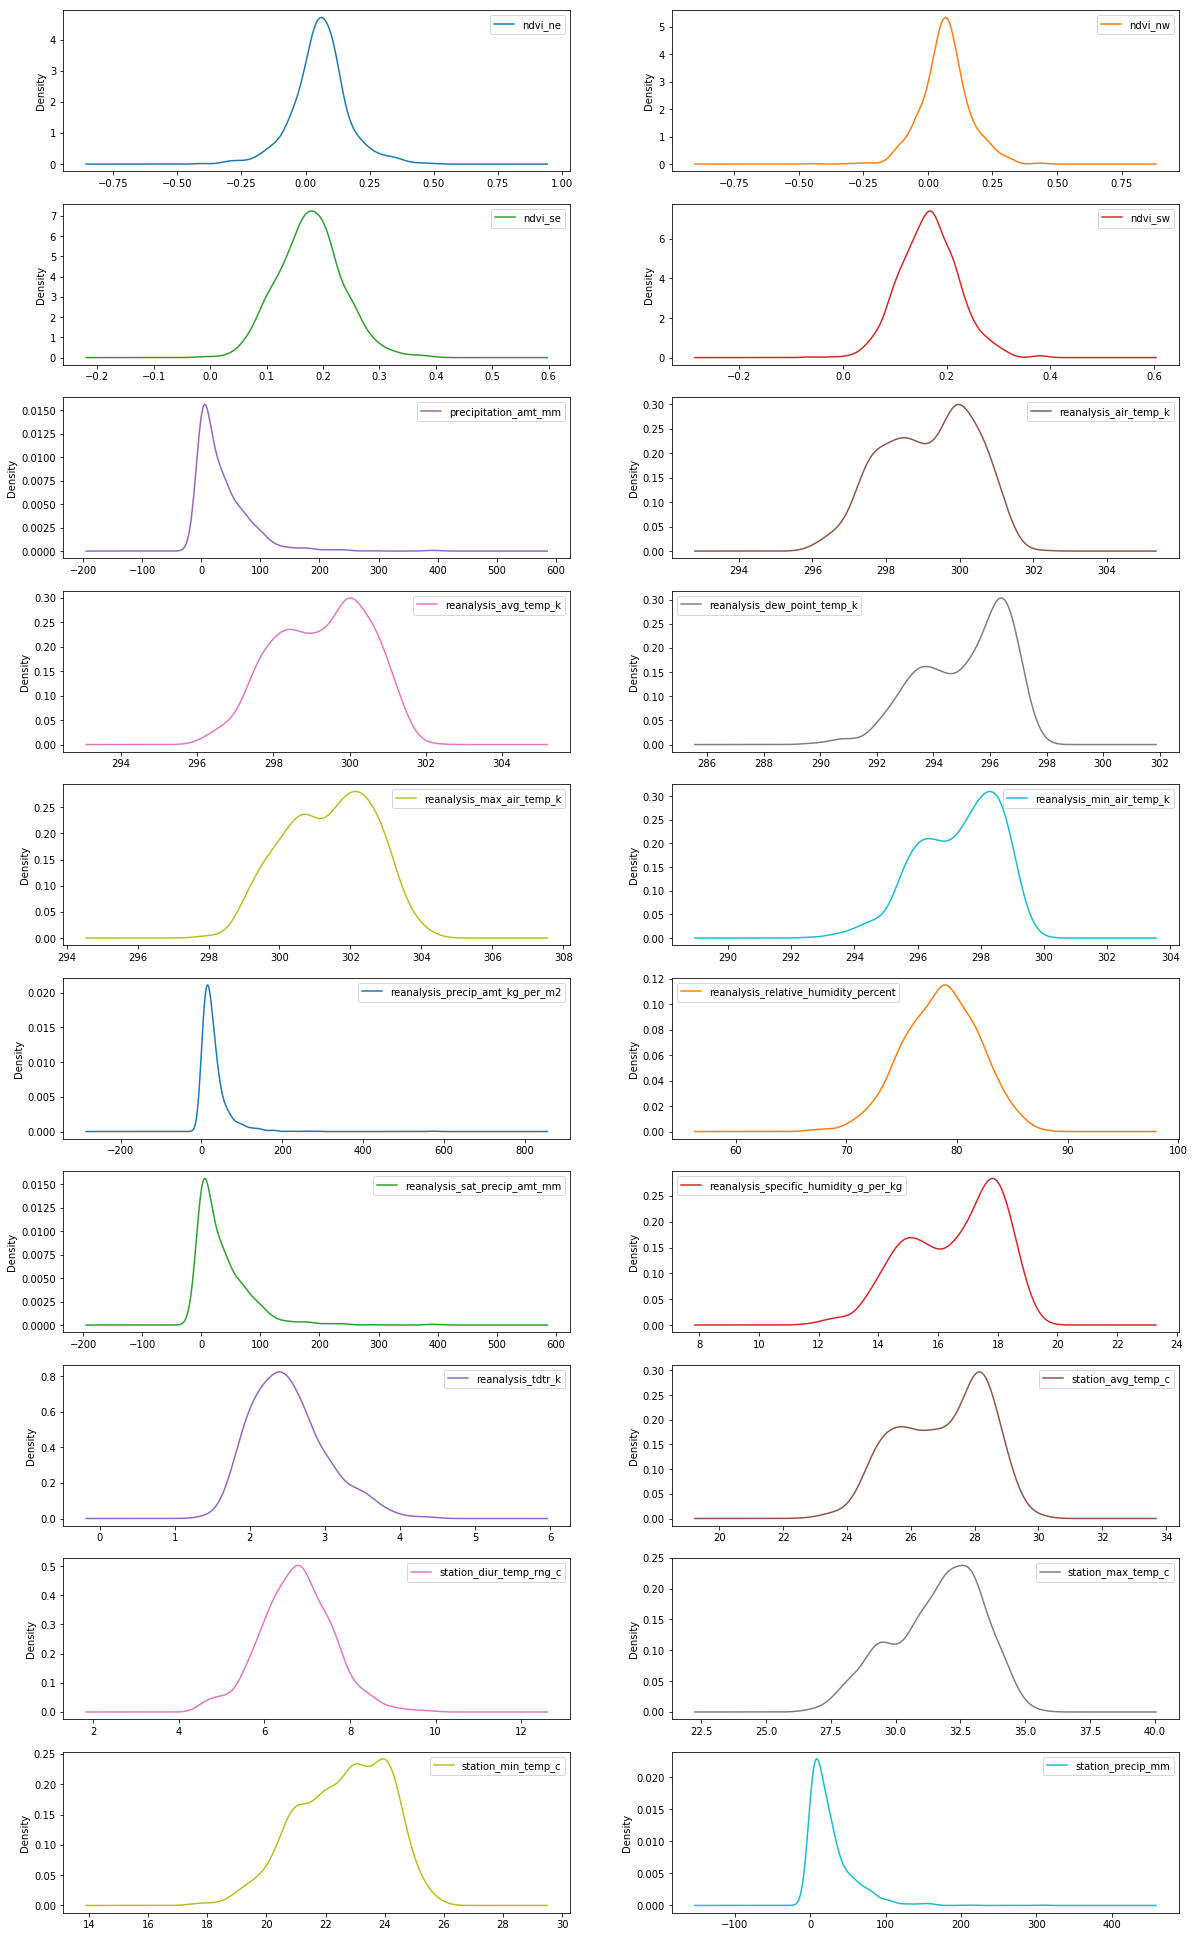

In [23]:
# San Juan
(sj_features.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(20, 35), layout=(10, 2), sharex=False));

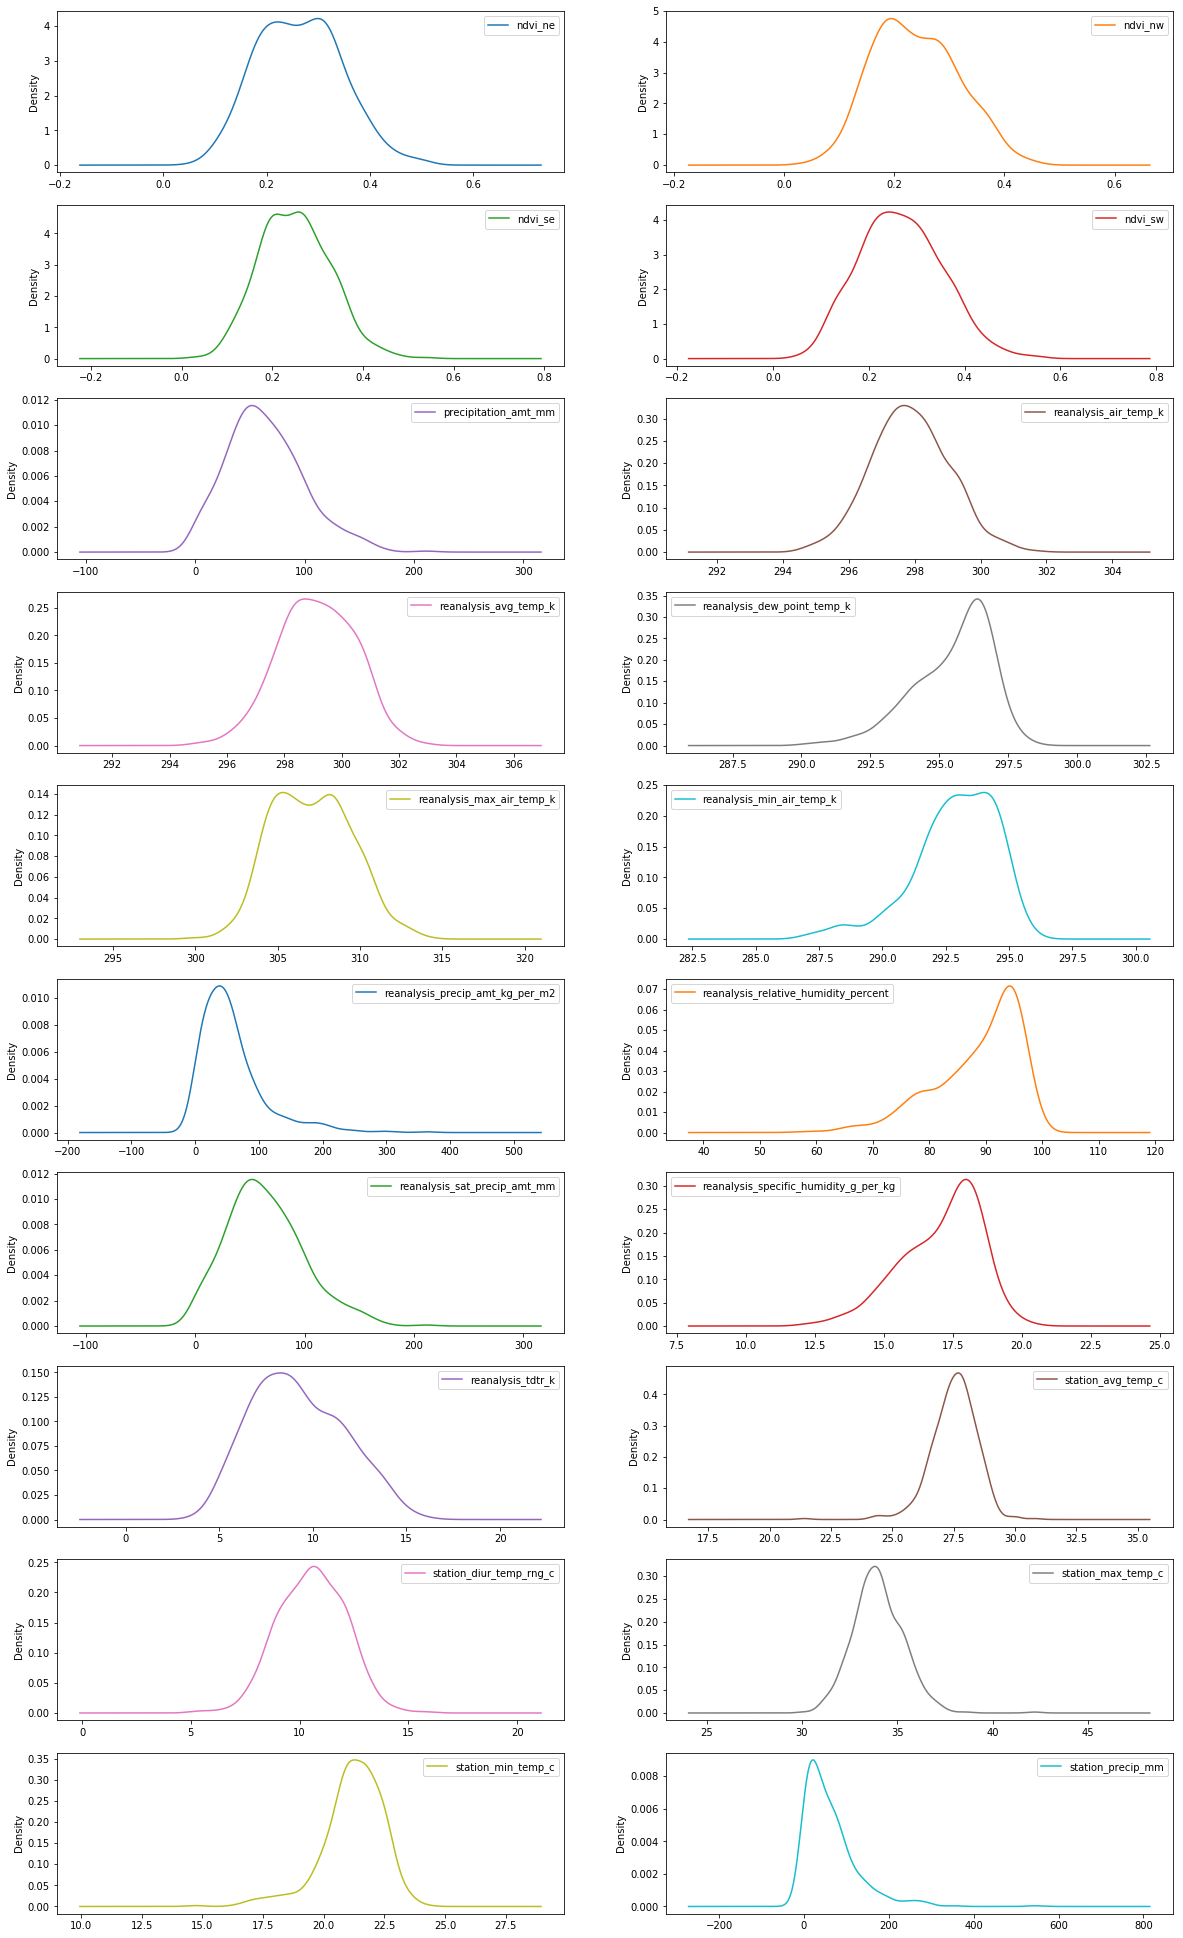

In [24]:
# Iquitos
(iq_features.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(20, 35), layout=(10, 2), sharex=False));

### Comparing cities

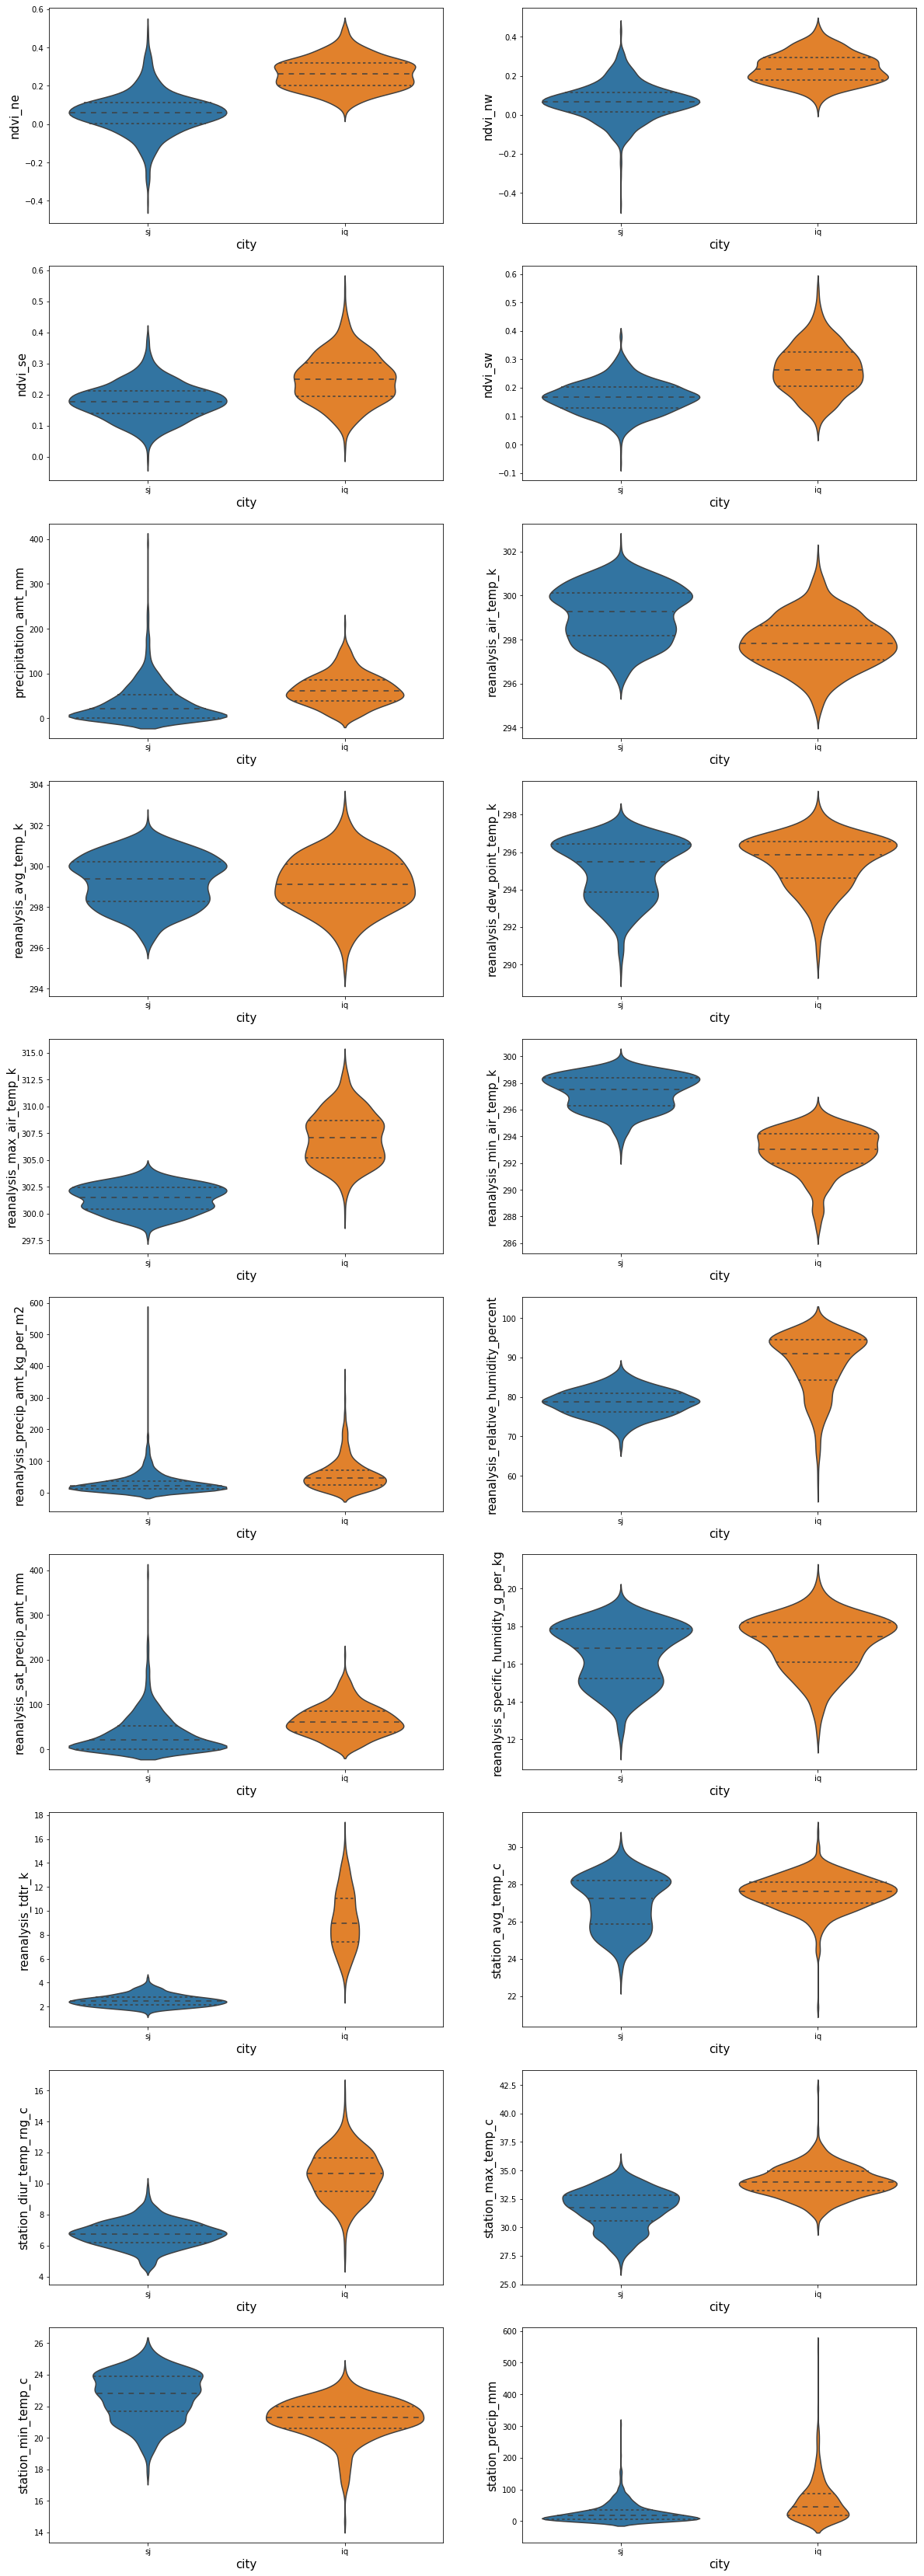

In [25]:
ft_cols = x_train.drop(['city', 'year', 'weekofyear', 'week_start_date'],axis=1).columns

fix, ax = plt.subplots(nrows = 10, ncols = 2, figsize = (20,60))
for i, j in enumerate(ft_cols):
    # inner options = ['box','quartile','point', 'stick', None]
    sns.violinplot(x = 'city', y = j, data = x_train, inner = 'quartile',
                   ax = ax[int(np.floor(i/2)),np.mod(i,2)])
    ax[int(np.floor(i/2)),np.mod(i,2)].yaxis.label.set_size(15)
    ax[int(np.floor(i/2)),np.mod(i,2)].xaxis.label.set_size(15)


## Total Cases Autocorrelation


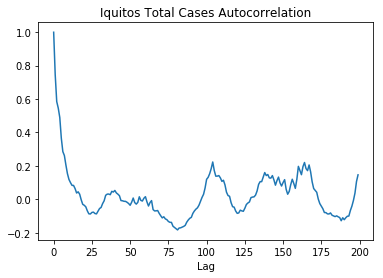

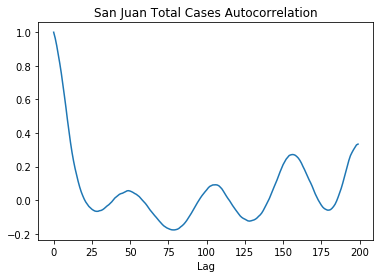

In [26]:
iq_autocorr = [city_iq.total_cases.autocorr(i) for i in range(200)]
plt.plot(iq_autocorr)
plt.title("Iquitos Total Cases Autocorrelation")
plt.xlabel("Lag")
plt.show()

sj_autocorr = [city_sj.total_cases.autocorr(i) for i in range(200)]
plt.plot(sj_autocorr)
plt.title("San Juan Total Cases Autocorrelation")
plt.xlabel("Lag")
plt.show()


#### Observations

- Both series show peaks in autocorrelation every 50 weeks or so (1 year)
- San Juan Data seems weirdly better behaved than Iquitos with respect to Autocorrelation



## Stationarity Analysis

In [27]:
from statsmodels.tsa.stattools import adfuller

# copied from https://github.com/miguelTorresPorta/TimeSeries/blob/master/timeSeries.ipynb
def stationarity_test(data):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    p_value = dftest[1]

    print("********************************")
    if p_value <= 0.01:
        print("Data is stationary\n")
    else:
        print("Data is non-stationary\n")
        
        
stationarity_test(city_iq.total_cases)
stationarity_test(city_sj.total_cases)

Results of Dickey-Fuller Test:
Test Statistic                -6.085429e+00
p-value                        1.067252e-07
#Lags Used                     4.000000e+00
Number of Observations Used    5.150000e+02
Critical Value (10%)          -2.569768e+00
Critical Value (5%)           -2.867168e+00
Critical Value (1%)           -3.443112e+00
dtype: float64
********************************
Data is stationary

Results of Dickey-Fuller Test:
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (10%)          -2.568435e+00
Critical Value (5%)           -2.864666e+00
Critical Value (1%)           -3.437432e+00
dtype: float64
********************************
Data is stationary



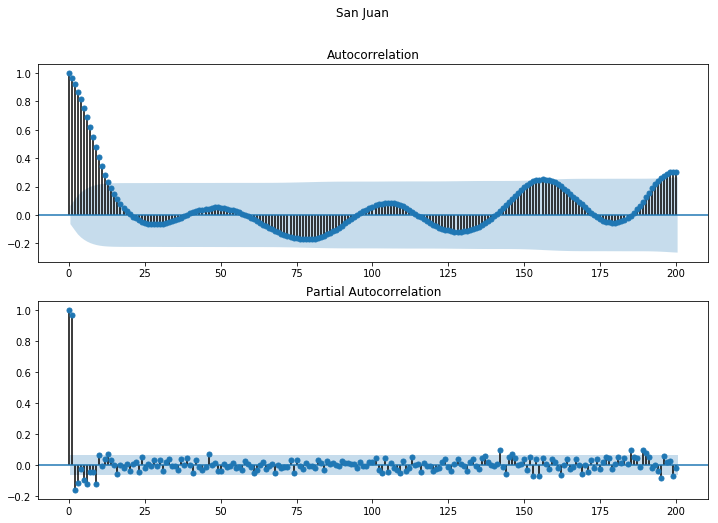

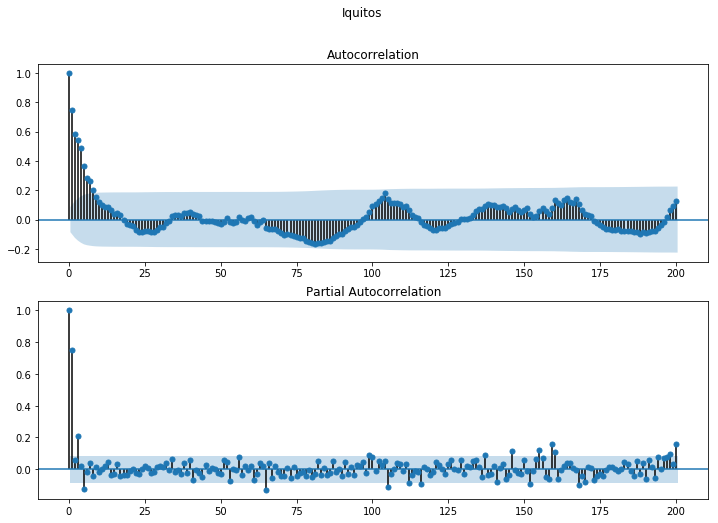

In [31]:
import statsmodels.api as sm


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(city_sj.total_cases, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(city_sj.total_cases, lags=200, ax=ax2)
fig.suptitle("San Juan");

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(city_iq.total_cases, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(city_iq.total_cases, lags=200, ax=ax2)
fig.suptitle("Iquitos");

## Correlation between features and between features and label

In [32]:
sj_features['total_cases'] =  city_sj.total_cases.values
sj_corr = sj_features.corr()

iq_features['total_cases'] =  city_iq.total_cases.values
iq_corr = iq_features.corr()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


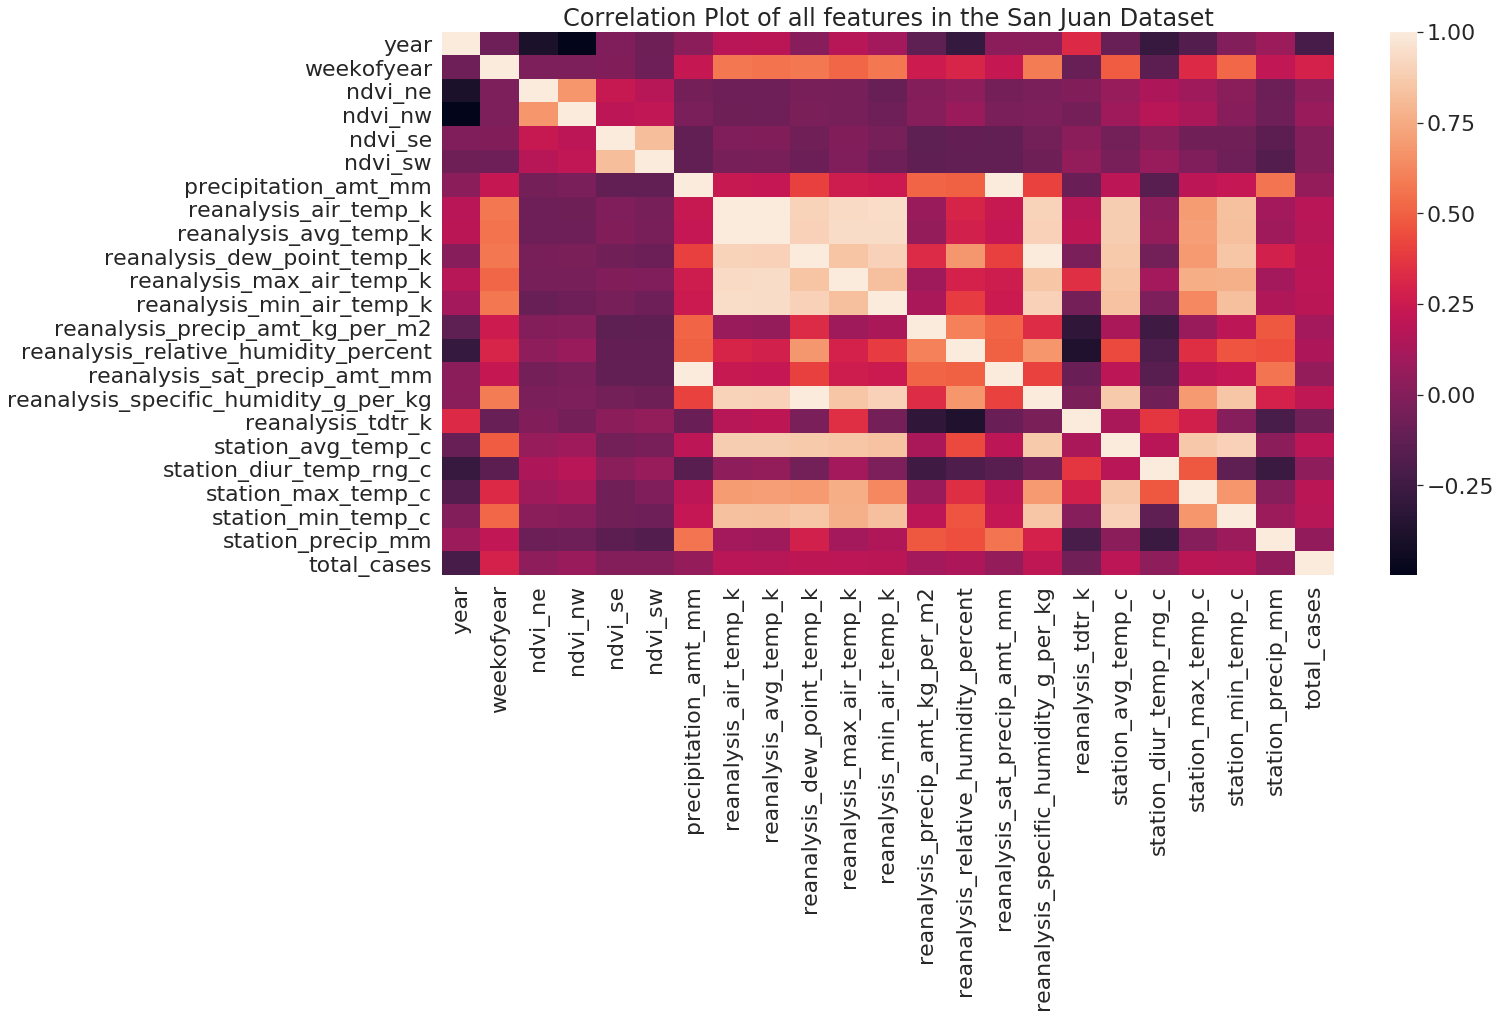

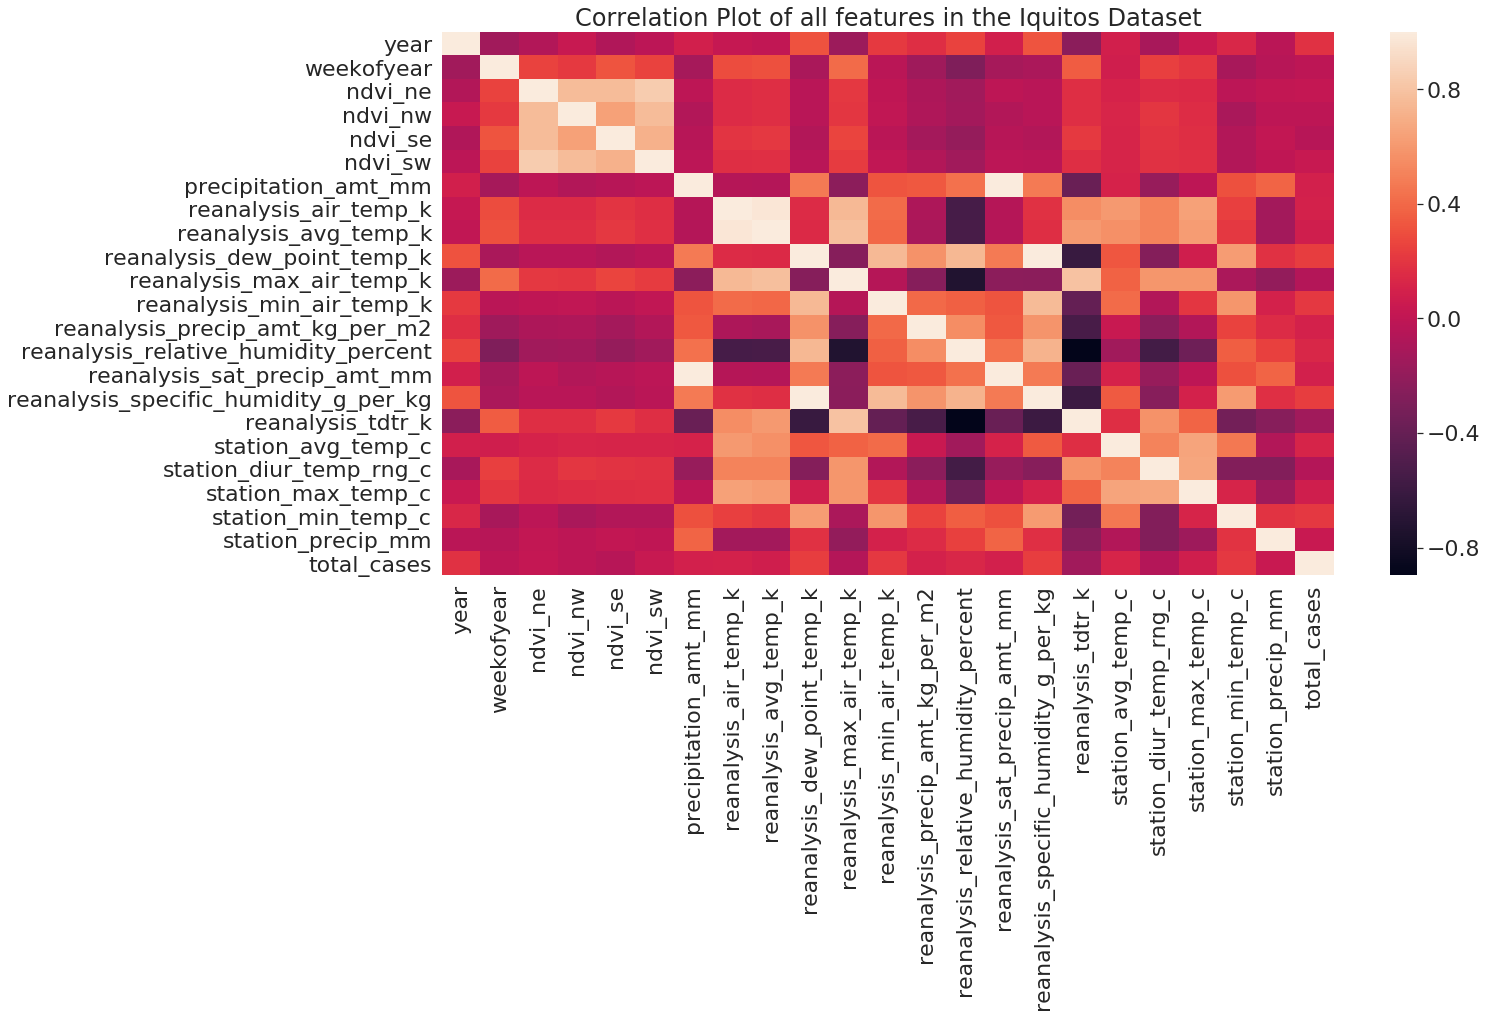

In [33]:
sns.set(font_scale = 2)

plt.figure(figsize=(20, 10))
sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')

plt.figure(figsize=(20, 10))
sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

plt.show()

We note the following for both the datasets:

- No variables are exceptionally good at predicting the label (total cases)

- The first 4 variables (Normalized Difference Vegetation Index) variables appears to be very weakly correlated with the other variables. They do not appear to be very useful in predicting the labels.

- Most of temperature variables in both datasets appear to be strongly correlated with one another.



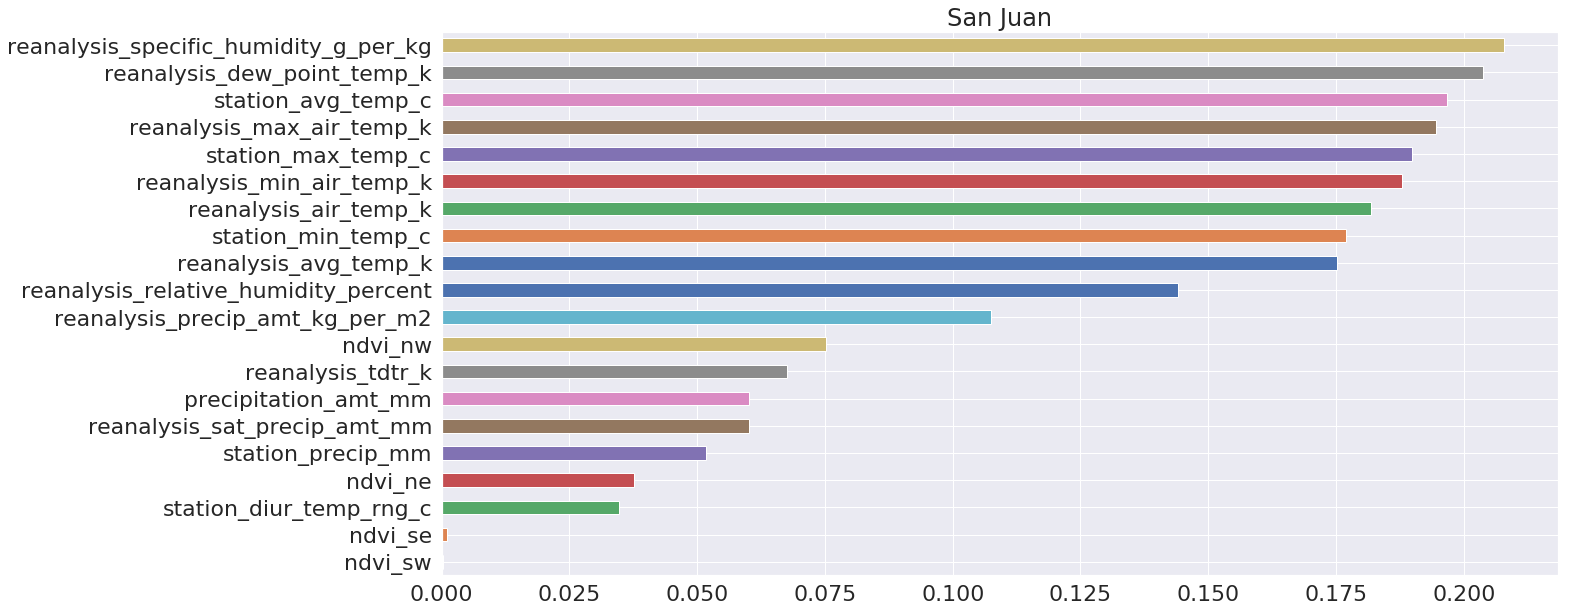

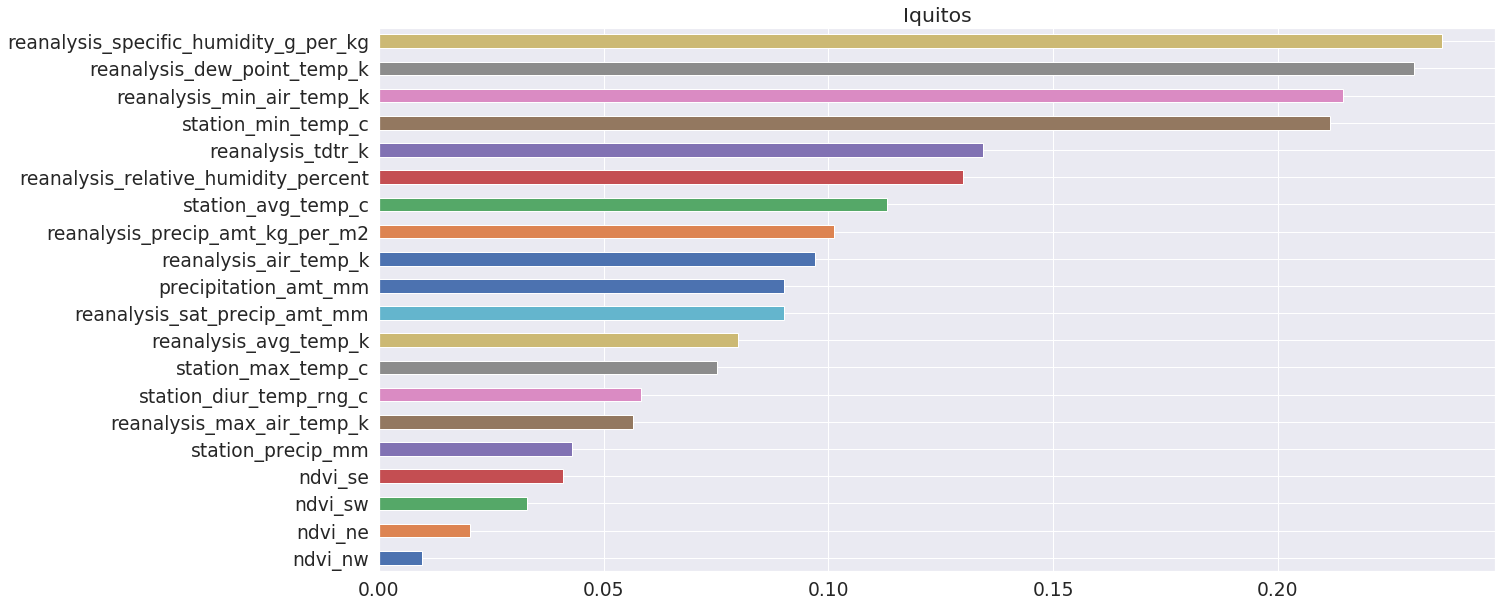

In [34]:
plt.figure(figsize=(20,10))
plt.title('San Juan')
sns.set(font_scale=1.7)
(abs(sj_corr)
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

plt.figure(figsize=(20,10))
plt.title('Iquitos')
sns.set(font_scale=1.7)
(abs(iq_corr)
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

Now we can see that humidity and temperature are the most correlated features with the number of cases variable.

## Handling missing data

Methods:

- ffill: propagate last valid observation forward to next valid backfill
- bfill: use next valid observation to fill gap
- drop: dataframe.dropna()

In [35]:
# fillna with ffill
data = pd.read_csv('../data/dengue_features_train.csv')
data['total_cases'] = y_train.total_cases.values
display(data[4:10])
print('Apply fillna')
data.fillna(method='ffill', inplace=True)
display(data[4:10])

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
4   sj  1990          22      1990-05-28  0.19620  0.262200  0.251200   
5   sj  1990          23      1990-06-04      NaN  0.174850  0.254314   
6   sj  1990          24      1990-06-11  0.11290  0.092800  0.205071   
7   sj  1990          25      1990-06-18  0.07250  0.072500  0.151471   
8   sj  1990          26      1990-06-25  0.10245  0.146175  0.125571   
9   sj  1990          27      1990-07-02      NaN  0.121550  0.160683   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k     ...       \
4  0.247340                  7.52             299.518571     ...        
5  0.181743                  9.58             299.630000     ...        
6  0.210271                  3.48             299.207143     ...        
7  0.133029                151.12             299.591429     ...        
8  0.123600                 19.32             299.578571     ...        
9  0.202567                 14.41             300.154286     ...        

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
4                             80.460000                          7.52   
5                             79.891429                          9.58   
6                             82.000000                          3.48   
7                             83.375714                        151.12   
8                             82.768571                         19.32   
9                             81.281429                         14.41   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
4                              17.210000           3.014286   
5                              17.212857           2.100000   
6                              17.234286           2.042857   
7                              17.977143           1.571429   
8                              17.790000           1.885714   
9                              18.071429           2.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
4           28.942857                 9.371429                35.0   
5           28.114286                 6.942857                34.4   
6           27.414286                 6.771429                32.2   
7           28.371429                 7.685714                33.9   
8           28.328571                 7.385714                33.9   
9           28.328571                 6.514286                33.9   

   station_min_temp_c  station_precip_mm  total_cases  
4                23.9                5.8            6  
5                23.9               39.1            2  
6                23.3               29.7            4  
7                22.8               21.1            5  
8                22.8               21.1           10  
9                24.4                1.1            6  

[6 rows x 25 columns]

Apply fillna


city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
4   sj  1990          22      1990-05-28  0.19620  0.262200  0.251200   
5   sj  1990          23      1990-06-04  0.19620  0.174850  0.254314   
6   sj  1990          24      1990-06-11  0.11290  0.092800  0.205071   
7   sj  1990          25      1990-06-18  0.07250  0.072500  0.151471   
8   sj  1990          26      1990-06-25  0.10245  0.146175  0.125571   
9   sj  1990          27      1990-07-02  0.10245  0.121550  0.160683   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k     ...       \
4  0.247340                  7.52             299.518571     ...        
5  0.181743                  9.58             299.630000     ...        
6  0.210271                  3.48             299.207143     ...        
7  0.133029                151.12             299.591429     ...        
8  0.123600                 19.32             299.578571     ...        
9  0.202567                 14.41             300.154286     ...        

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
4                             80.460000                          7.52   
5                             79.891429                          9.58   
6                             82.000000                          3.48   
7                             83.375714                        151.12   
8                             82.768571                         19.32   
9                             81.281429                         14.41   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
4                              17.210000           3.014286   
5                              17.212857           2.100000   
6                              17.234286           2.042857   
7                              17.977143           1.571429   
8                              17.790000           1.885714   
9                              18.071429           2.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
4           28.942857                 9.371429                35.0   
5           28.114286                 6.942857                34.4   
6           27.414286                 6.771429                32.2   
7           28.371429                 7.685714                33.9   
8           28.328571                 7.385714                33.9   
9           28.328571                 6.514286                33.9   

   station_min_temp_c  station_precip_mm  total_cases  
4                23.9                5.8            6  
5                23.9               39.1            2  
6                23.3               29.7            4  
7                22.8               21.1            5  
8                22.8               21.1           10  
9                24.4                1.1            6  

[6 rows x 25 columns]

In [36]:
sj_data = data.drop('city',axis=1)[data.city == 'sj']
iq_data = data.drop('city',axis=1)[data.city == 'iq']
print('San Juan data')
display(sj_data.head(3))
display(sj_data.describe().T)
print('Iquitos data')
display(iq_data.head(3))
display(iq_data.describe().T)

San Juan data


year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18      1990-04-30  0.12260  0.103725  0.198483  0.177617   
1  1990          19      1990-05-07  0.16990  0.142175  0.162357  0.155486   
2  1990          20      1990-05-14  0.03225  0.172967  0.157200  0.170843   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   

      ...       reanalysis_relative_humidity_percent  \
0     ...                                  73.365714   
1     ...                                  77.368571   
2     ...                                  82.052857   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  

[3 rows x 24 columns]

count         mean        std  \
year                                   936.0  1998.826923   5.212076   
weekofyear                             936.0    26.503205  15.021909   
ndvi_ne                                936.0     0.057726   0.104907   
ndvi_nw                                936.0     0.066542   0.091467   
ndvi_se                                936.0     0.176221   0.057586   
ndvi_sw                                936.0     0.166037   0.055823   
precipitation_amt_mm                   936.0    35.316485  44.655240   
reanalysis_air_temp_k                  936.0   299.158243   1.237297   
reanalysis_avg_temp_k                  936.0   299.271543   1.219798   
reanalysis_dew_point_temp_k            936.0   295.104736   1.570075   
reanalysis_max_air_temp_k              936.0   301.393162   1.259469   
reanalysis_min_air_temp_k              936.0   297.297863   1.295172   
reanalysis_precip_amt_kg_per_m2        936.0    30.401154  35.532376   
reanalysis_relative_humidity_percent   936.0    78.570324   3.384775   
reanalysis_sat_precip_amt_mm           936.0    35.316485  44.655240   
reanalysis_specific_humidity_g_per_kg  936.0    16.547535   1.560663   
reanalysis_tdtr_k                      936.0     2.514667   0.498182   
station_avg_temp_c                     936.0    26.999191   1.415079   
station_diur_temp_rng_c                936.0     6.755189   0.835052   
station_max_temp_c                     936.0    31.597009   1.719094   
station_min_temp_c                     936.0    22.594017   1.506281   
station_precip_mm                      936.0    26.756838  29.264050   
total_cases                            936.0    34.180556  51.381372   

                                               min          25%          50%  \
year                                   1990.000000  1994.000000  1999.000000   
weekofyear                                1.000000    13.750000    26.500000   
ndvi_ne                                  -0.406250     0.005146     0.056725   
ndvi_nw                                  -0.456100     0.016100     0.068175   
ndvi_se                                  -0.015533     0.137747     0.175757   
ndvi_sw                                  -0.063457     0.129706     0.166900   
precipitation_amt_mm                      0.000000     0.000000    20.450000   
reanalysis_air_temp_k                   295.938571   298.193571   299.246429   
reanalysis_avg_temp_k                   296.114286   298.298214   299.378571   
reanalysis_dew_point_temp_k             289.642857   293.843929   295.451429   
reanalysis_max_air_temp_k               297.800000   300.400000   301.500000   
reanalysis_min_air_temp_k               292.600000   296.300000   297.500000   
reanalysis_precip_amt_kg_per_m2           0.000000    10.875000    21.280000   
reanalysis_relative_humidity_percent     66.735714    76.246786    78.667857   
reanalysis_sat_precip_amt_mm              0.000000     0.000000    20.450000   
reanalysis_specific_humidity_g_per_kg    11.715714    15.233571    16.835000   
reanalysis_tdtr_k                         1.357143     2.157143     2.457143   
station_avg_temp_c                       22.842857    25.842857    27.214286   
station_diur_temp_rng_c                   4.528571     6.200000     6.757143   
station_max_temp_c                       26.700000    30.600000    31.700000   
station_min_temp_c                       17.800000    21.700000    22.800000   
station_precip_mm                         0.000000     6.875000    17.650000   
total_cases                               0.000000     9.000000    19.000000   

                                               75%          max  
year                                   2003.000000  2008.000000  
weekofyear                               39.250000    53.000000  
ndvi_ne                                   0.109962     0.493400  
ndvi_nw                                   0.113512     0.437100  
ndvi_se                                   0.211596     0.39

Iquitos data


year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
936  2000          26      2000-07-01  0.192886  0.132257  0.340886  0.247200   
937  2000          27      2000-07-08  0.216833  0.276100  0.289457  0.241657   
938  2000          28      2000-07-15  0.176757  0.173129  0.204114  0.128014   

     precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
936                 25.41             296.740000             298.450000   
937                 60.61             296.634286             298.428571   
938                 55.52             296.415714             297.392857   

        ...       reanalysis_relative_humidity_percent  \
936     ...                                  92.418571   
937     ...                                  93.581429   
938     ...                                  95.848571   

     reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
936                         25.41                              16.651429   
937                         60.61                              16.862857   
938                         55.52                              17.120000   

     reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
936           8.928571                26.4                10.775000   
937          10.314286                26.9                11.566667   
938           7.385714                26.8                11.466667   

     station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
936                32.5                20.7                3.0            0  
937                34.0                20.8               55.6            0  
938                33.0                20.7               38.1            0  

[3 rows x 24 columns]

count         mean        std  \
year                                   520.0  2005.000000   2.918283   
weekofyear                             520.0    26.503846  15.029450   
ndvi_ne                                520.0     0.263654   0.081591   
ndvi_nw                                520.0     0.238813   0.076733   
ndvi_se                                520.0     0.250099   0.077669   
ndvi_sw                                520.0     0.266698   0.086309   
precipitation_amt_mm                   520.0    64.353750  35.180867   
reanalysis_air_temp_k                  520.0   297.869464   1.171486   
reanalysis_avg_temp_k                  520.0   299.131374   1.332866   
reanalysis_dew_point_temp_k            520.0   295.498723   1.414360   
reanalysis_max_air_temp_k              520.0   307.066923   2.389779   
reanalysis_min_air_temp_k              520.0   292.879038   1.662983   
reanalysis_precip_amt_kg_per_m2        520.0    57.590500  50.125737   
reanalysis_relative_humidity_percent   520.0    88.666786   7.580526   
reanalysis_sat_precip_amt_mm           520.0    64.353750  35.180867   
reanalysis_specific_humidity_g_per_kg  520.0    17.102019   1.443048   
reanalysis_tdtr_k                      520.0     9.189835   2.455961   
station_avg_temp_c                     520.0    27.506331   0.908973   
station_diur_temp_rng_c                520.0    10.480468   1.561678   
station_max_temp_c                     520.0    33.966731   1.355439   
station_min_temp_c                     520.0    21.210385   1.257734   
station_precip_mm                      520.0    61.581346  62.968520   
total_cases                            520.0     7.565385  10.765478   

                                               min          25%          50%  \
year                                   2000.000000  2002.750000  2005.000000   
weekofyear                                1.000000    13.750000    26.500000   
ndvi_ne                                   0.061729     0.199879     0.263528   
ndvi_nw                                   0.035860     0.179530     0.233243   
ndvi_se                                   0.029880     0.194607     0.249764   
ndvi_sw                                   0.064183     0.203843     0.262221   
precipitation_amt_mm                      0.000000    39.147500    60.470000   
reanalysis_air_temp_k                   294.635714   297.092500   297.822857   
reanalysis_avg_temp_k                   294.892857   298.217857   299.121429   
reanalysis_dew_point_temp_k             290.088571   294.596429   295.852143   
reanalysis_max_air_temp_k               300.000000   305.200000   307.000000   
reanalysis_min_air_temp_k               286.900000   292.000000   293.100000   
reanalysis_precip_amt_kg_per_m2           0.000000    24.212500    46.440000   
reanalysis_relative_humidity_percent     57.787143    84.295000    90.942857   
reanalysis_sat_precip_amt_mm              0.000000    39.147500    60.470000   
reanalysis_specific_humidity_g_per_kg    12.111429    16.121429    17.428571   
reanalysis_tdtr_k                         3.714286     7.371429     8.957143   
station_avg_temp_c                       21.400000    26.957500    27.587500   
station_diur_temp_rng_c                   5.200000     9.400000    10.510000   
station_max_temp_c                       30.100000    33.175000    34.000000   
station_min_temp_c                       14.700000    20.600000    21.400000   
station_precip_mm                         0.000000    16.875000    44.050000   
total_cases                               0.000000     1.000000     5.000000   

                                               75%          max  
year                                   2007.250000  2010.000000  
weekofyear                               39.250000    53.000000  
ndvi_ne                                   0.320021     0.508357  
ndvi_nw                                   0.293989     0.454429  
ndvi_se                                   0.302550     0.53

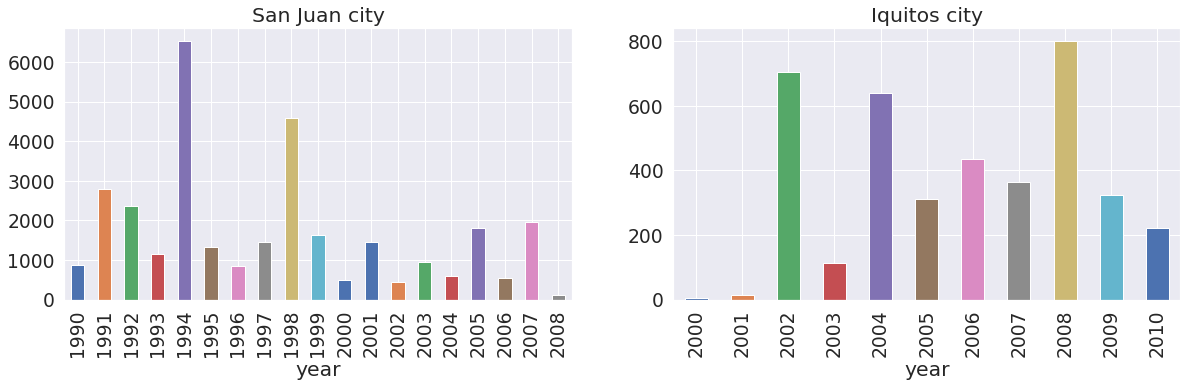

In [37]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sj_data.groupby(['year']).total_cases.sum().plot(kind='bar')
plt.title('San Juan city')

plt.subplot(1,2,2)
iq_data.groupby(['year']).total_cases.sum().plot(kind='bar')
plt.title('Iquitos city')

plt.show()

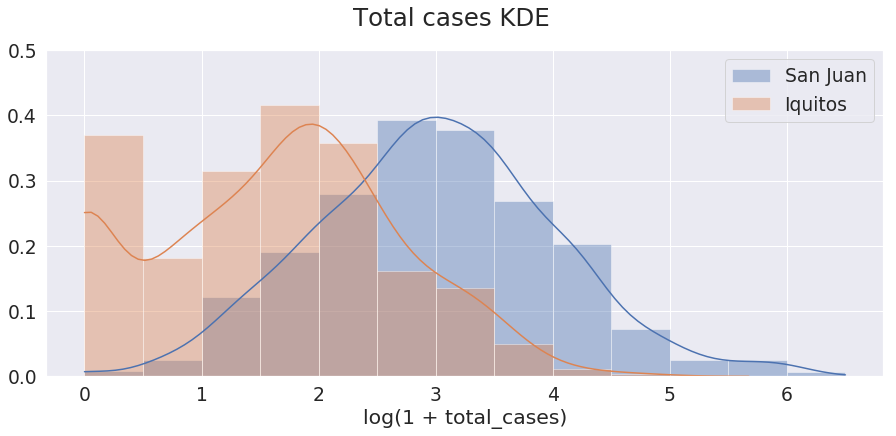

In [38]:
fig, ax = plt.subplots(figsize = (15,6))
fig.suptitle('Total cases KDE')
sns.distplot(np.log(1+data[data['city'] == 'sj']['total_cases']), kde = True,
             kde_kws={'clip': (0.0, 6.5)}, bins = np.arange(0, 7,0.5), norm_hist = True, label = 'San Juan')
sns.distplot(np.log(1+data[data['city'] == 'iq']['total_cases']), kde = True,
             kde_kws={'clip': (0.0, 6.5)}, bins = np.arange(0, 7,0.5), norm_hist = True, label = 'Iquitos')
ax.set_xlabel('log(1 + total_cases)')
ax.legend(loc = 'upper right')
ax.set_ylim(0,0.5);

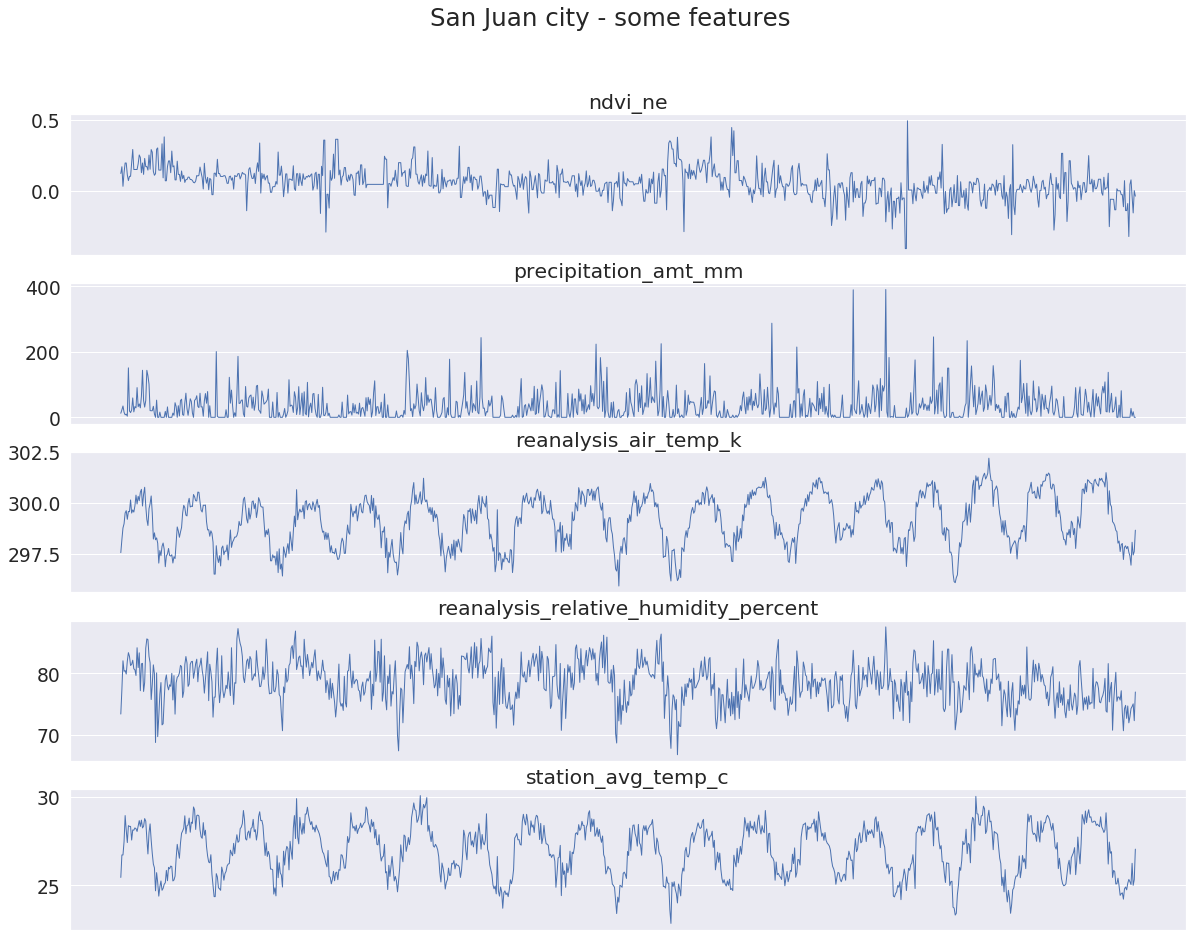

In [39]:
plt.figure(figsize = (20, 15))
plt.suptitle('San Juan city - some features')

plt.subplot(5,1,1)
sj_data.ndvi_ne.plot.line(lw = 1)
plt.xticks([])
plt.title('ndvi_ne')
plt.subplot(5,1,2)
sj_data.precipitation_amt_mm.plot.line(lw = 1)
plt.xticks([])
plt.title('precipitation_amt_mm')
plt.subplot(5,1,3)
sj_data.reanalysis_air_temp_k.plot.line(lw = 1)
plt.xticks([])
plt.title('reanalysis_air_temp_k')
plt.subplot(5,1,4)
sj_data.reanalysis_relative_humidity_percent.plot.line(lw = 1)
plt.xticks([])
plt.title('reanalysis_relative_humidity_percent')
plt.subplot(5,1,5)
sj_data.station_avg_temp_c.plot.line(lw = 1)
plt.xticks([])
plt.title('station_avg_temp_c')

plt.show()

In [40]:
print('Quantity of Null elements in each column for San Juan City')
display(sj_data.isnull().sum())

print('Quantity of Null elements in each column for Iquitos City')
display(iq_data.isnull().sum())

Quantity of Null elements in each column for San Juan City


year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

Quantity of Null elements in each column for Iquitos City


year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

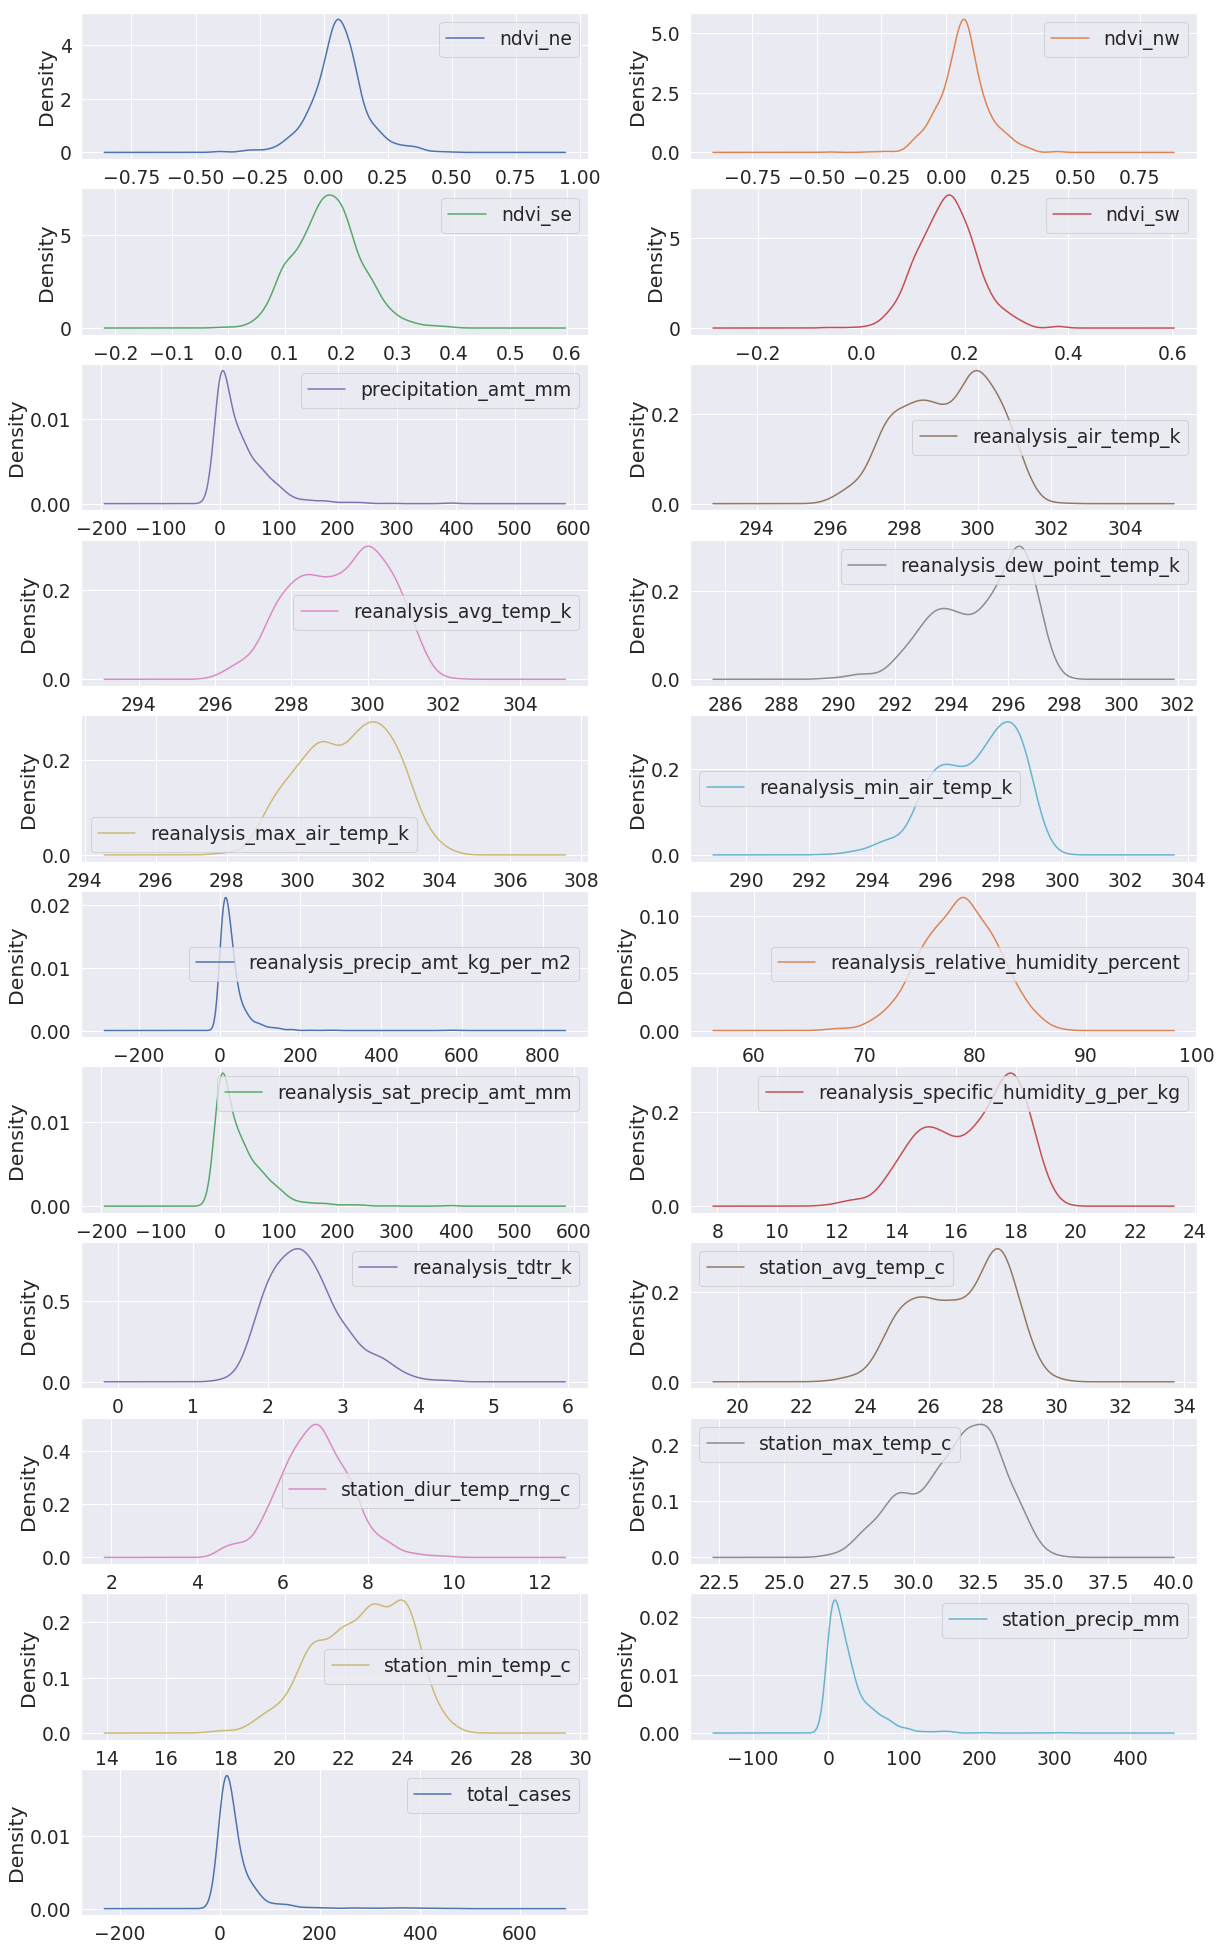

In [41]:
# San Juan
(sj_data.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(20, 35), layout=(11, 2), sharex=False));

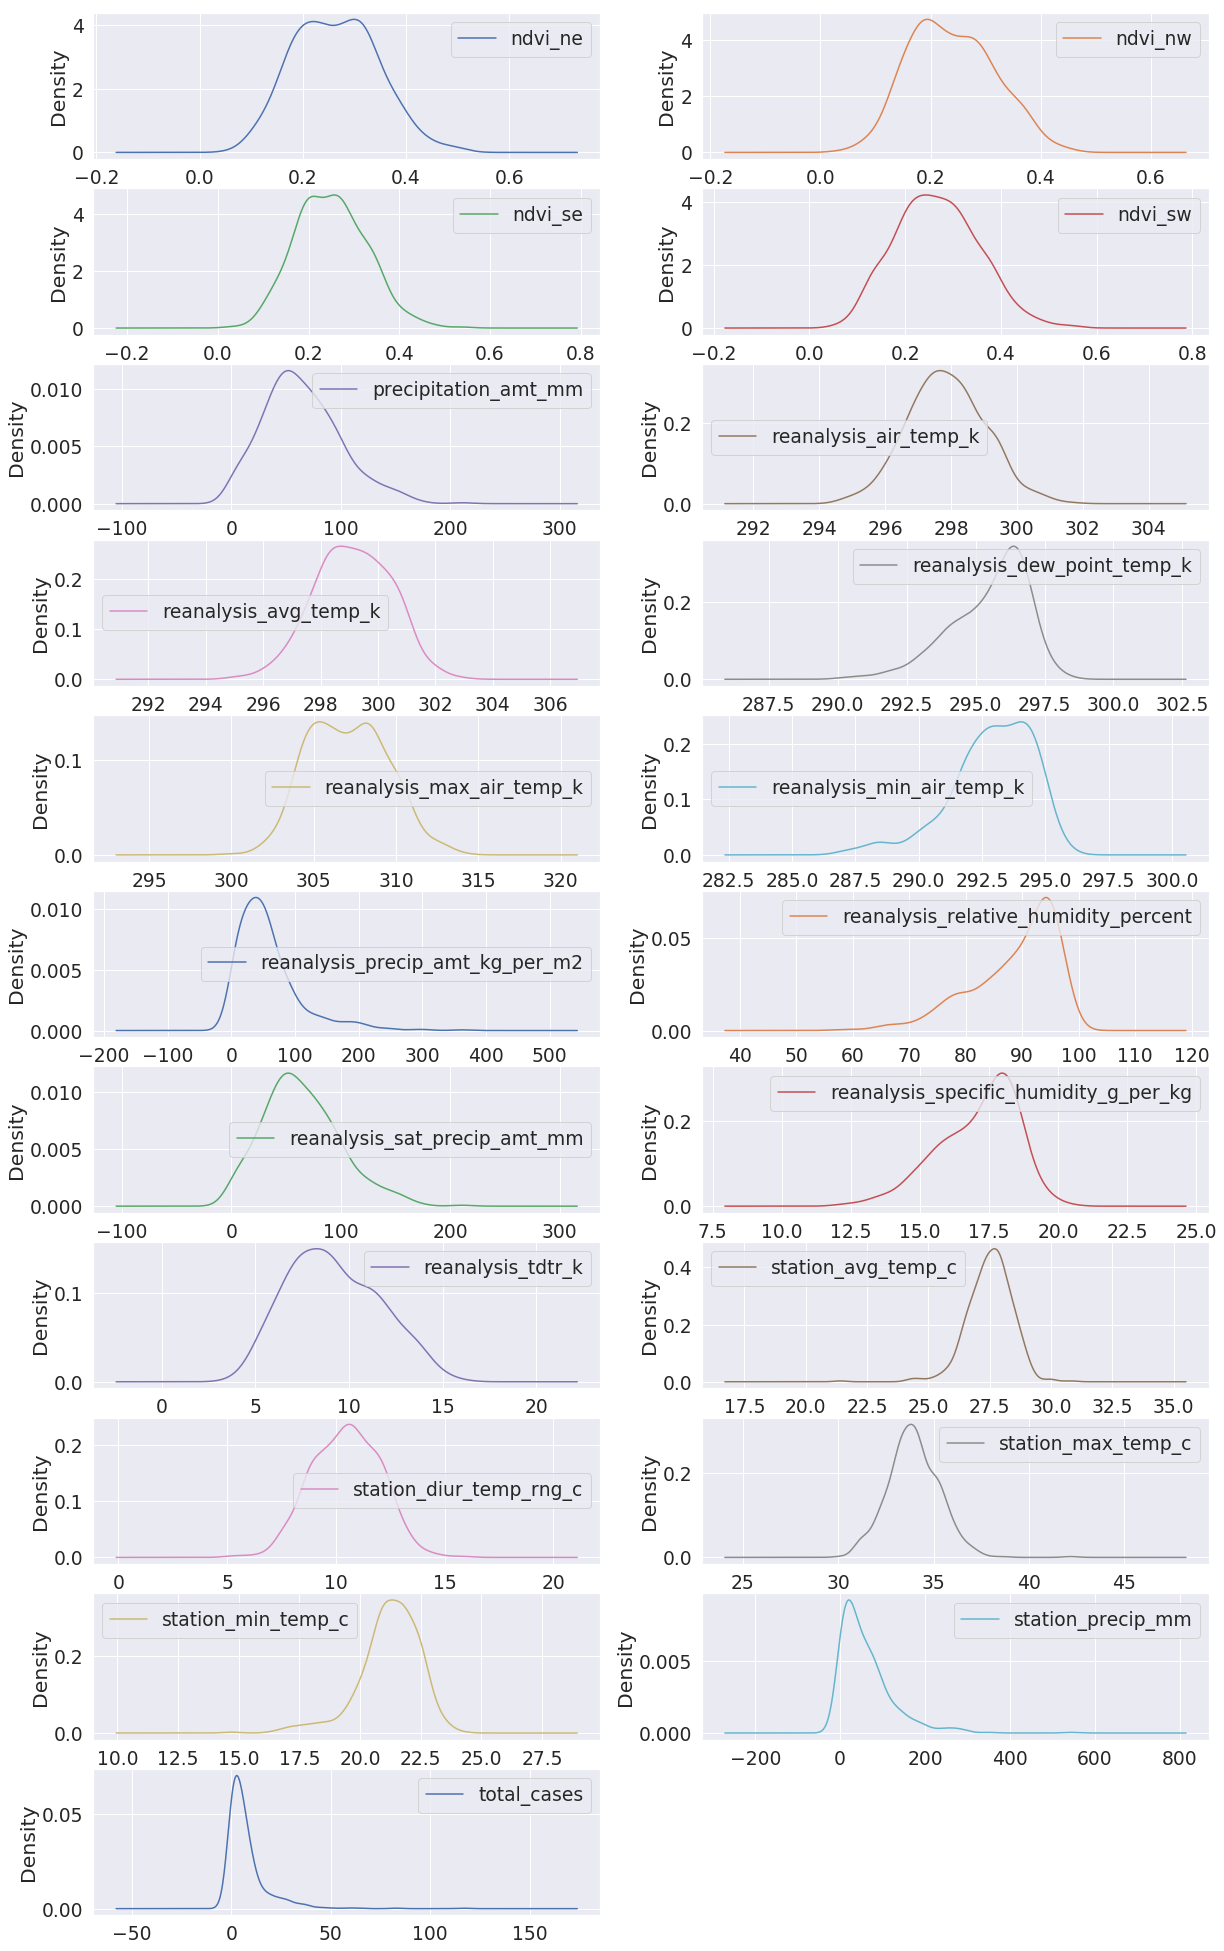

In [42]:
# Iquitos
(iq_data.drop(['year', 'weekofyear'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(20, 35), layout=(11, 2), sharex=False));

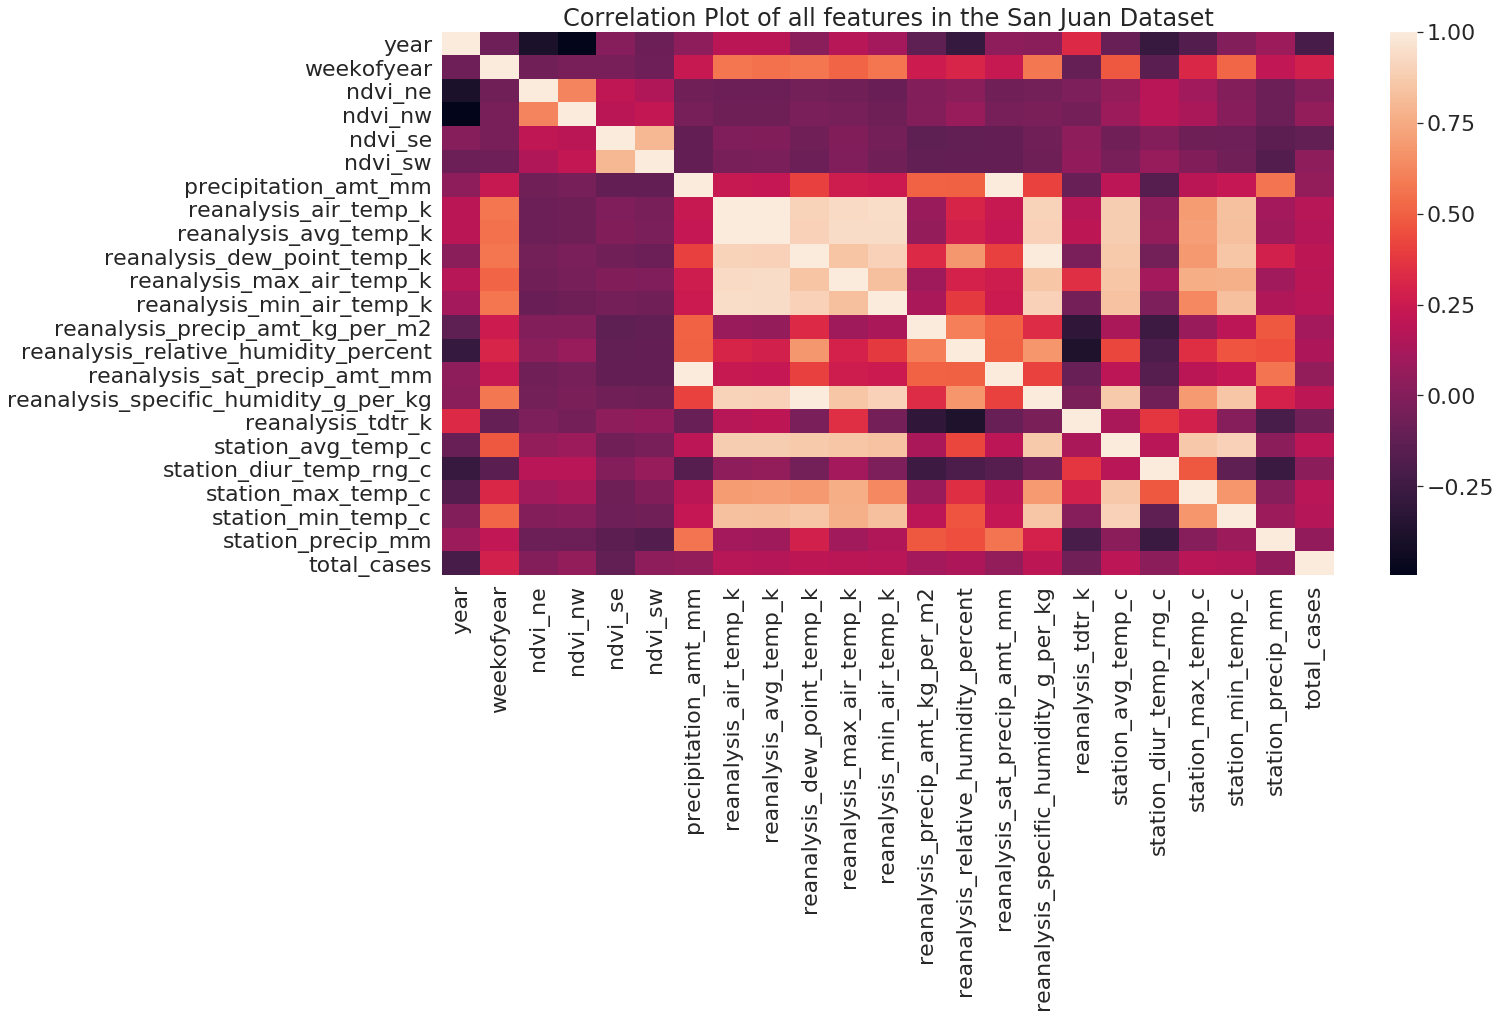

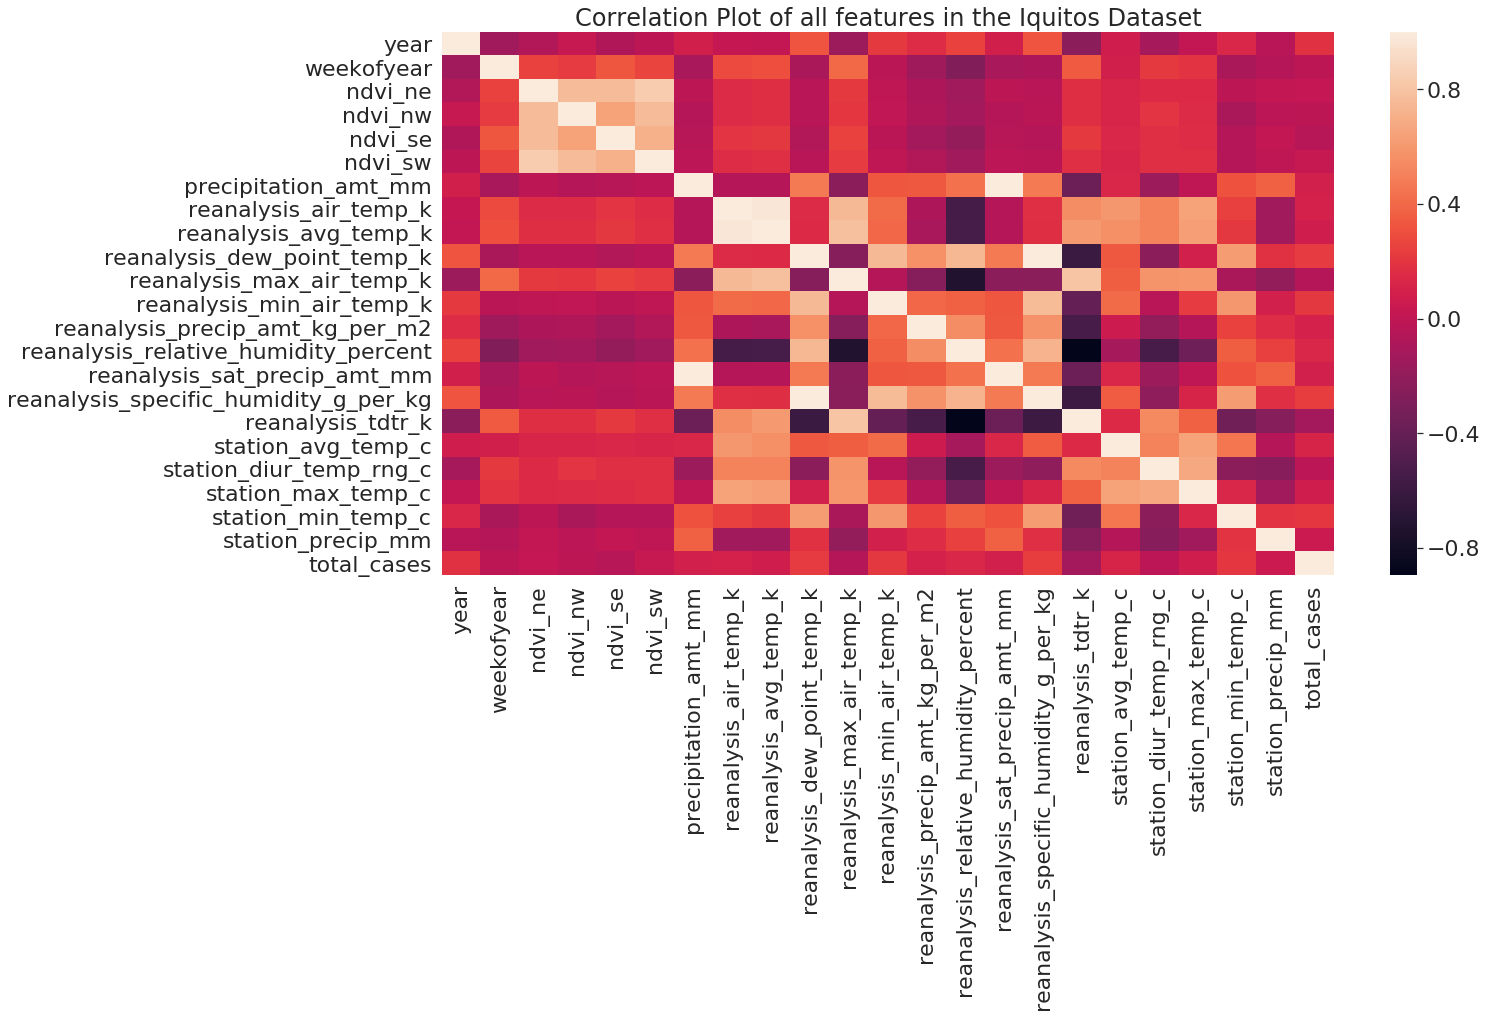

In [43]:
sj_corr = sj_data.corr()
iq_corr = iq_data.corr()

sns.set(font_scale = 2)

plt.figure(figsize=(20, 10))
sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the San Juan Dataset')

plt.figure(figsize=(20, 10))
sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Iquitos Dataset')

plt.show()

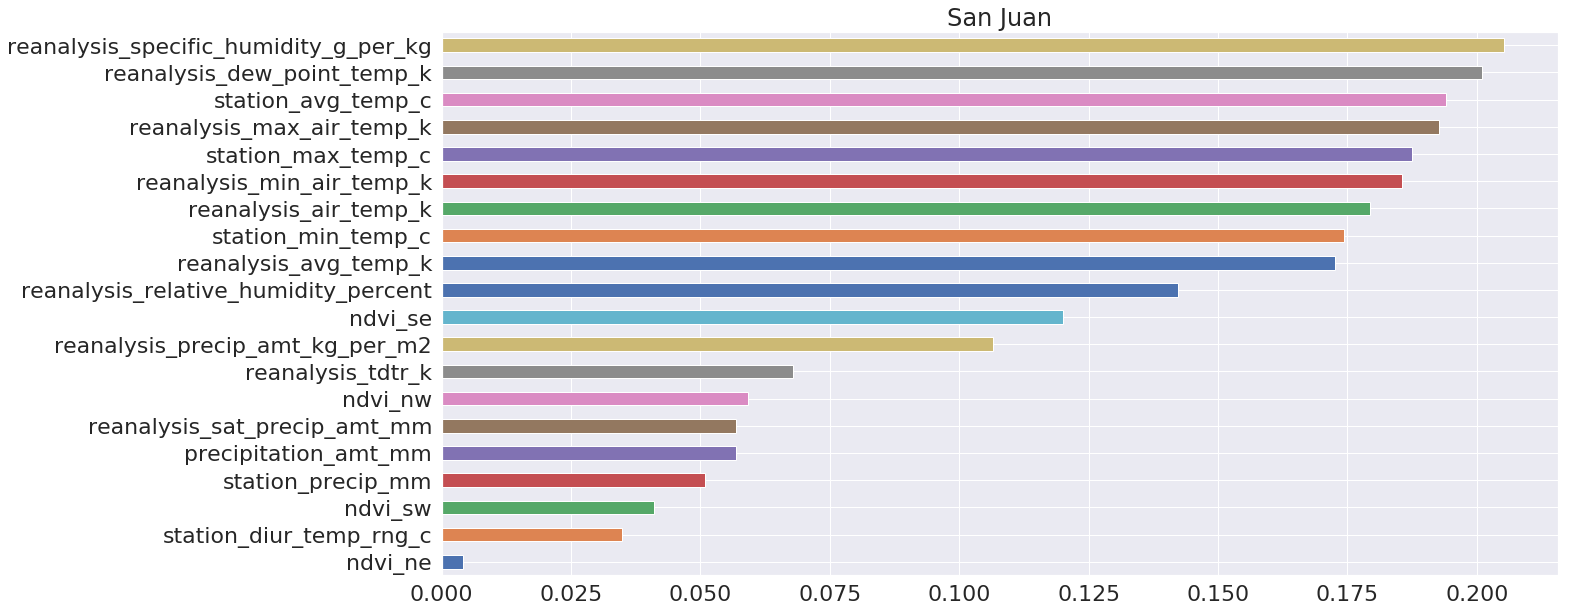

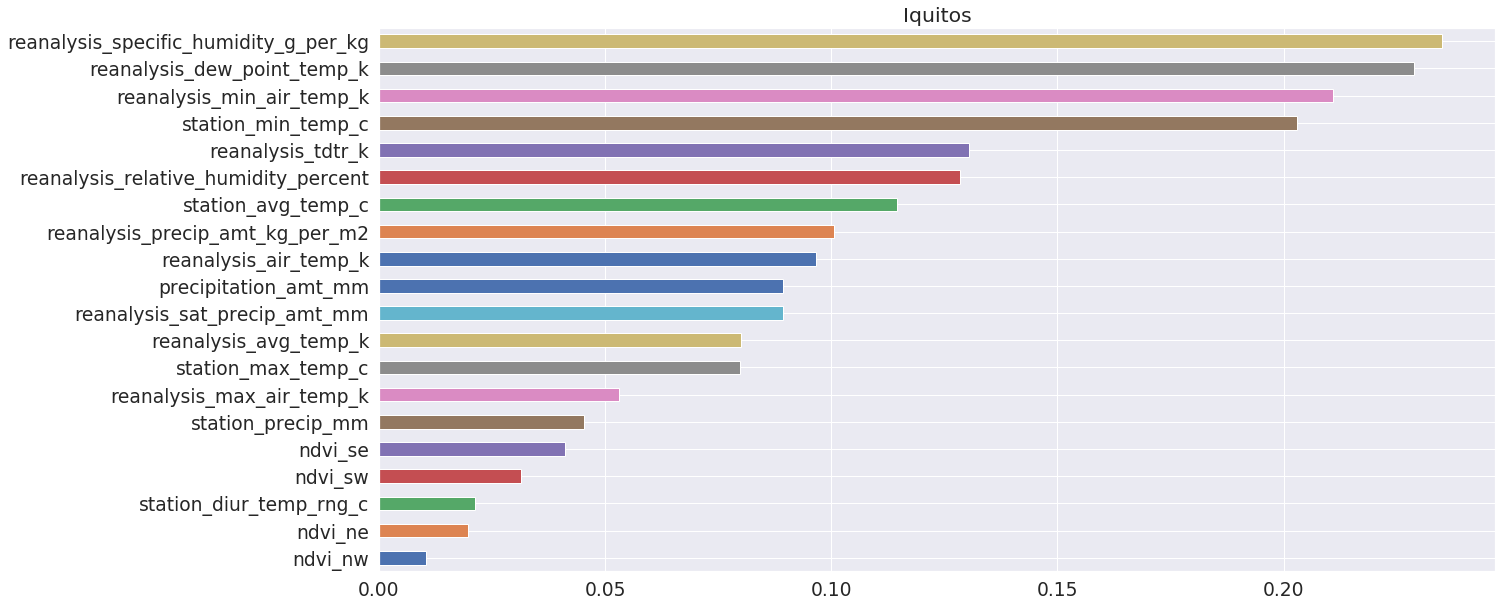

In [44]:
plt.figure(figsize=(20,10))
plt.title('San Juan')
sns.set(font_scale=1.7)
(abs(sj_corr)
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

plt.figure(figsize=(20,10))
plt.title('Iquitos')
sns.set(font_scale=1.7)
(abs(iq_corr)
 .total_cases
 .drop(['total_cases','weekofyear','year'])
 .sort_values()
 .plot
 .barh())

## References

- https://github.com/ngbolin/DengAI/blob/master/DengAI.ipynb
- https://github.com/jdills26/dengue-fever-prediction/blob/master/exploration-and-visuals.ipynb
- https://github.com/chrisgschon/DengAI/blob/master/notebooks/Exploratory_Data_Analysis.ipynb
- https://github.com/umstek/DengAI/blob/master/Interactive%20Python%202/1-initial-cleaning.ipynb
- https://github.com/miguelTorresPorta/TimeSeries/blob/master/timeSeries.ipynb